In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
for d in kgs.load_all_train_data(validation_only=True)[::500]:
    print(d.family)

CurveFault_A
CurveFault_B
CurveVel_A
CurveVel_B
FlatFault_A
FlatFault_B
FlatVel_A
FlatVel_B
Style_A
Style_B


In [3]:
#data=kgs.load_all_train_data(validation_only=True)[1500:2000][::2]
data=kgs.load_all_train_data(validation_only=True)[500:2000][::2] + kgs.load_all_train_data(validation_only=True)[2500:3000][::2]
np.random.default_rng(seed=0).shuffle(data)
for d in data[::50]:
    print(d.family)

CurveVel_A
CurveVel_A
CurveVel_B
CurveVel_B
CurveFault_B
CurveFault_B
CurveVel_A
CurveVel_B
CurveFault_B
FlatFault_B
CurveFault_B
FlatFault_B
CurveVel_B
CurveFault_B
CurveVel_A
CurveVel_A
CurveFault_B
FlatFault_B
CurveVel_A
CurveVel_A


capturing graph


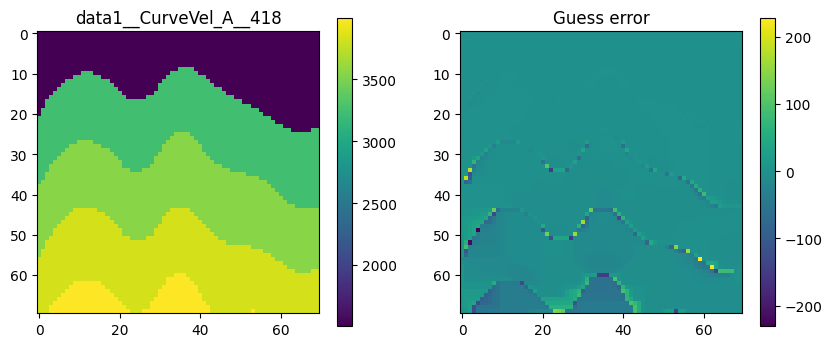

diag 7.413739765243915e-05
400
capturing graph
500 96.58327422640374
MAE update:  6.635323949653035
diag 7.413739765243915e-05
400
500 1140.0646192209656
MAE update:  6.386702937254152
diag 7.413739765243915e-05
400
500 1367.2011222301098
MAE update:  5.975491762768055
diag 7.413739765243915e-05
400
500 485.7872477421283
MAE update:  5.087632085864224
diag 7.413739765243915e-05
400
500 2021.4215911997742
MAE update:  4.01176179954156


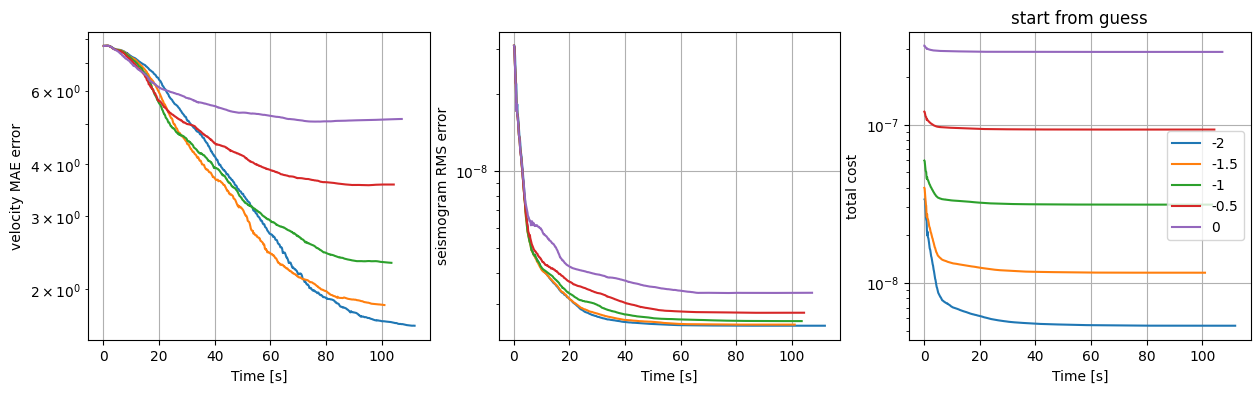

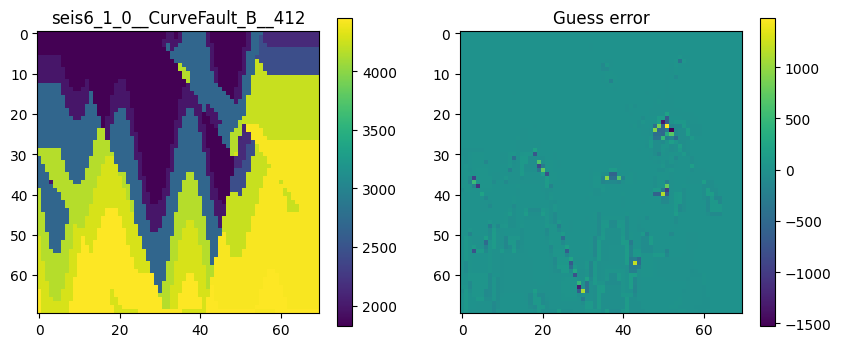

diag 2.0252871357521773e-05
764
500 9902.122377070305
1000 18720.543318457963
1500 24617.590496997596
2000 3151.3479219108704
MAE update:  16.927799463302076
diag 2.0252871357521773e-05
764
500 12568.085059465087
1000 9264.054148477308
1500 8318.781735099634
2000 5796.59939103142
MAE update:  14.002593697604393
diag 2.0252871357521773e-05
764
500 13573.394104771574
1000 5142.892632505125
1500 6003.515182836225
2000 1151.9562172749067
MAE update:  10.864250824077486
diag 2.0252871357521773e-05
764
500 8064.448307796712
1000 4839.324331487866
1500 1045.1217857432462
2000 359.6895281320182
MAE update:  8.589186659505536
diag 2.0252871357521773e-05
764
500 20598.75089995688
1000 3344.4475357786646
1500 853.4561819744683
2000 402.51283044890073
MAE update:  7.510541490877441


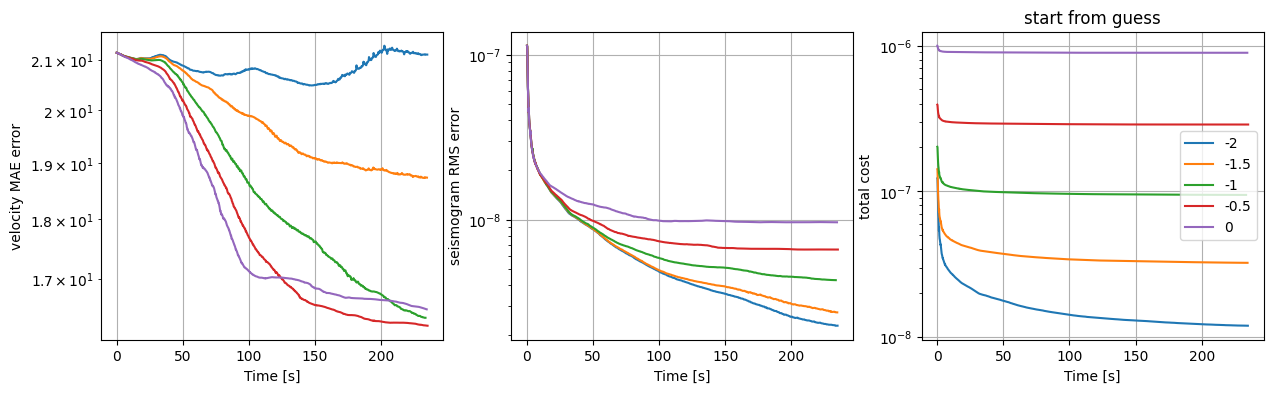

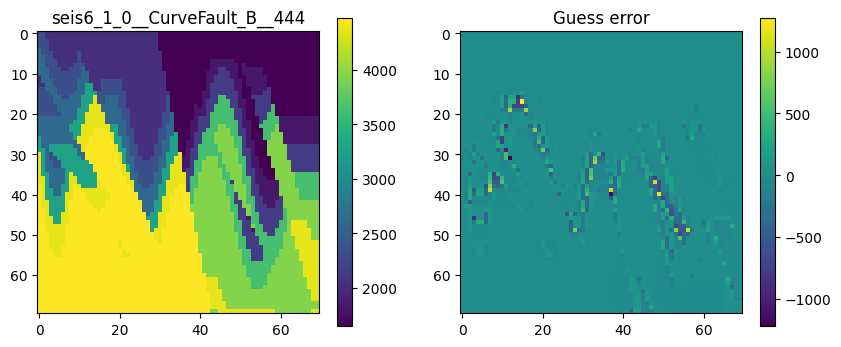

diag 5.511339434384172e-05
864
500 7965.234773931548
1000 5827.921344172848
1500 3992.486372124547
2000 1360.701604521497
MAE update:  24.630246211880955
diag 5.511339434384172e-05
864
500 5836.354803420718
1000 6796.184833672179
1500 6632.095656434631
2000 3369.642224703123
MAE update:  19.696223726058392
diag 5.511339434384172e-05
864
500 4225.979962089745
1000 2589.588099785889
1500 1481.0744834420918
2000 910.4588824055048
MAE update:  14.442006231774274
diag 5.511339434384172e-05
864
500 6468.997466041197
1000 4153.254297622223
1500 1227.0336819656034
2000 1446.8883756326368
MAE update:  11.359775233917146
diag 5.511339434384172e-05
864
500 8791.010123455273
1000 1328.4145236360287
1500 5400.904091439274
2000 236.49152351982534
MAE update:  8.558139275909525


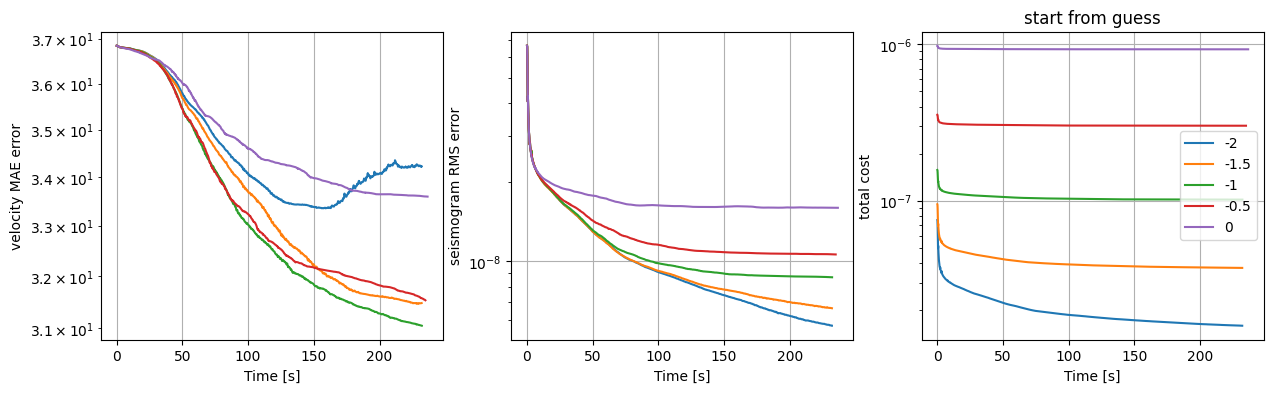

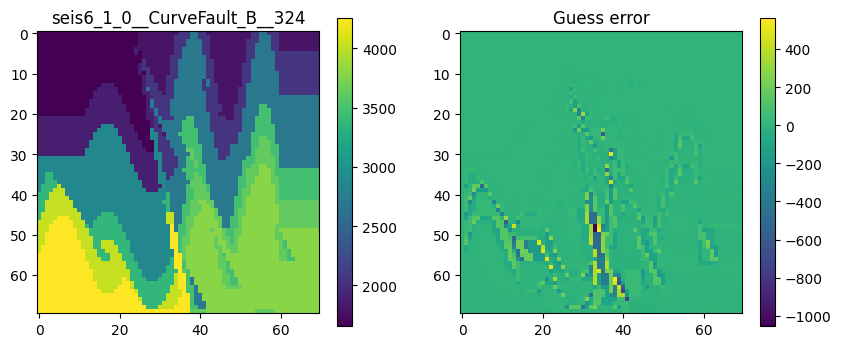

diag 3.9643101810108595e-05
750
500 3056.2645550980724
1000 4895.428935246719
1500 915.0863818607255
2000 251.80221724498043
MAE update:  16.975722190979862
diag 3.9643101810108595e-05
750
500 4548.14901353296
1000 1098.200556963931
1500 1445.1874312695072
2000 258.91581326516507
MAE update:  13.492915888432181
diag 3.9643101810108595e-05
750
500 4327.779562358372
1000 1925.9439004851145
1500 709.7563497170639
2000 165.67804118498128
MAE update:  10.234930812636899
diag 3.9643101810108595e-05
750
500 4231.603779832349
1000 557.9110211757095
1500 187.72887916395098
2000 112.65506008791897
MAE update:  8.068405322471387
diag 3.9643101810108595e-05
750
500 2941.4525905353717
1000 380.1199216571563
1500 186.08866841349976
2000 190.0387659662482
MAE update:  5.754244390878325


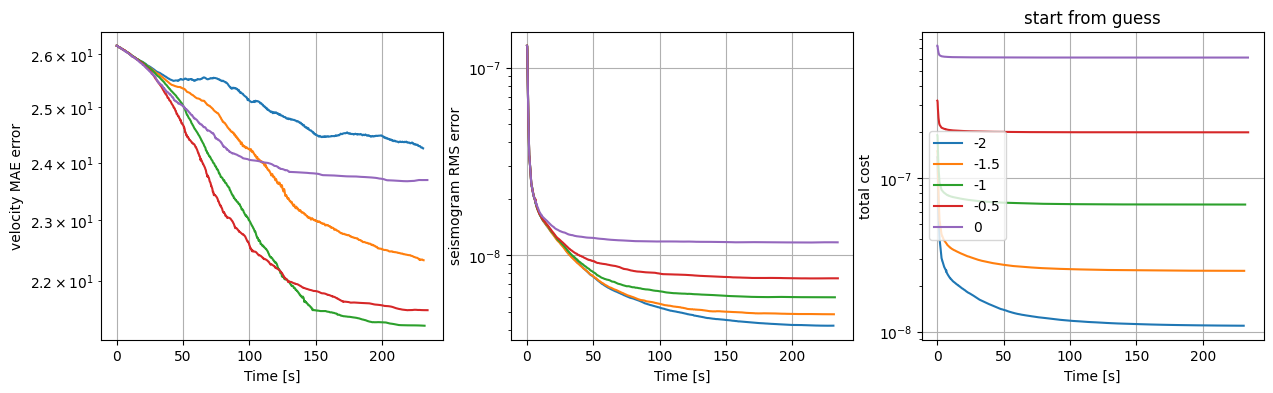

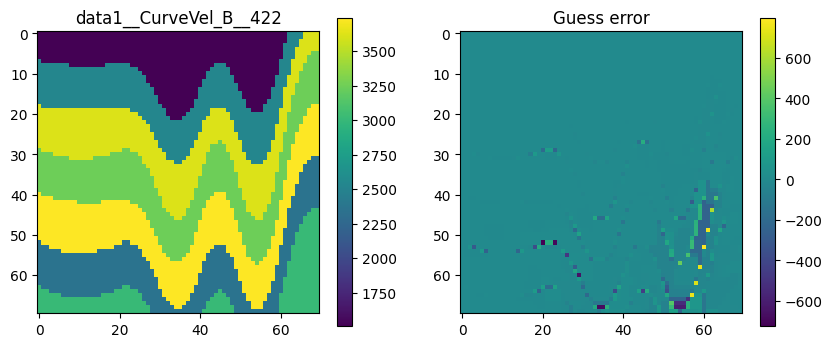

diag 8.047549326679173e-05
468
500 419.5971704113313
1000 35.58352372964691
MAE update:  10.360822418664403
diag 8.047549326679173e-05
468
500 452.25523029723485
1000 107.68772154174106
MAE update:  9.183655932315384
diag 8.047549326679173e-05
468
500 494.81118802793264
MAE update:  7.752503926043571
diag 8.047549326679173e-05
468
500 450.74270737794876
MAE update:  6.567874352638498
diag 8.047549326679173e-05
468
500 381.70303049651653
MAE update:  5.269850522442921


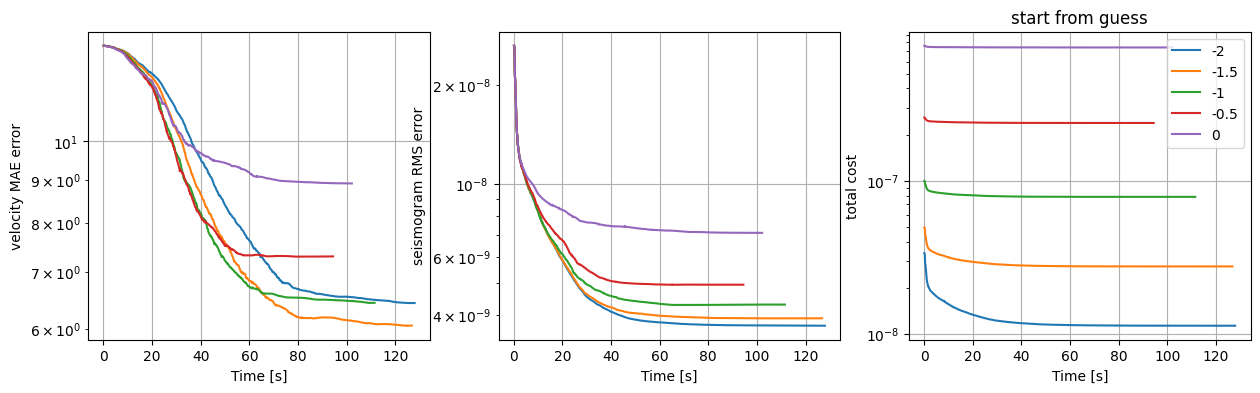

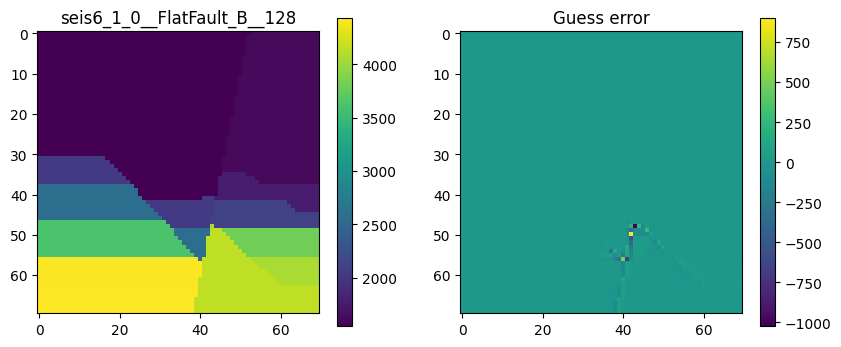

diag 4.0521875603854166e-05
183
500 3576.516518058197
1000 774.3819686972963
1500 1943.6395998366793
MAE update:  2.9347701759129423
diag 4.0521875603854166e-05
183
500 3527.474706207857
1000 6128.956486469398
1500 114.73246771110118
MAE update:  2.914166708811897
diag 4.0521875603854166e-05
183
500 1673.940021593271
1000 8850.470161689926
MAE update:  2.8635433730673827
diag 4.0521875603854166e-05
183
500 899.1595987222289
1000 992.091113995912
MAE update:  2.731793078052985
diag 4.0521875603854166e-05
183
500 7908.603795686094
1000 130.52141231214893
MAE update:  2.261214011209291


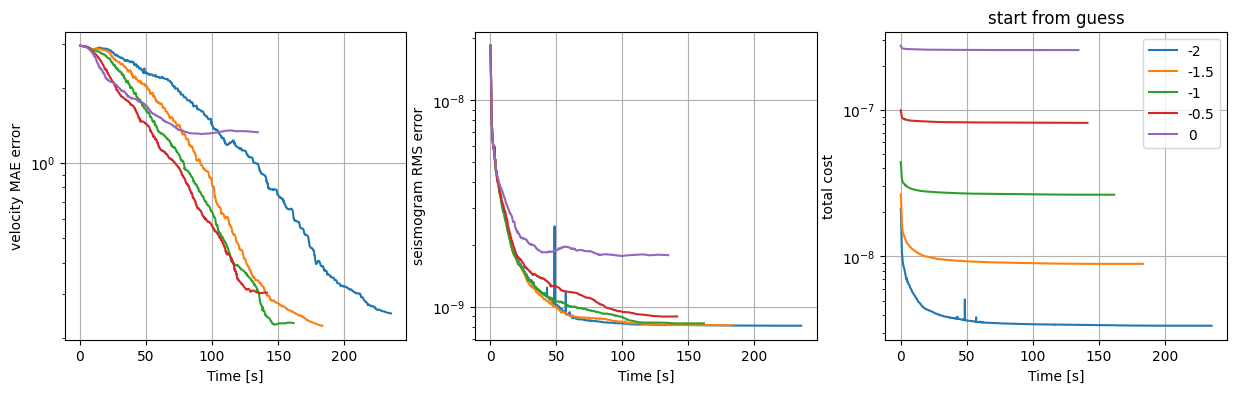

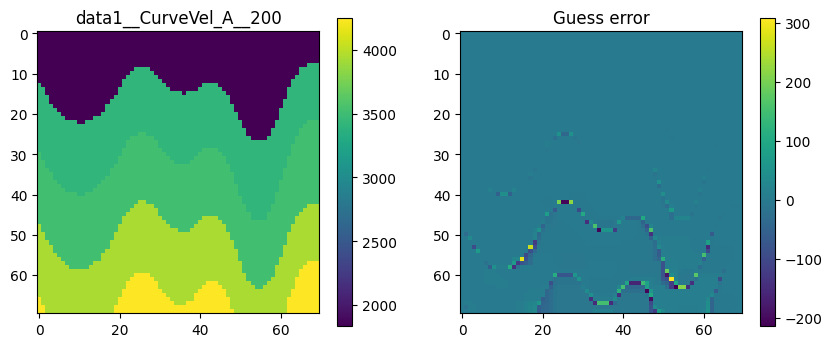

diag 4.962639081518887e-05
278
500 46.09209951888928
MAE update:  3.8267789286311387
diag 4.962639081518887e-05
278
500 27.66967300534345
MAE update:  3.5459854388708534
diag 4.962639081518887e-05
278
500 78.6833166802353
MAE update:  3.3531259270869787
diag 4.962639081518887e-05
278
500 85.3603302975564
MAE update:  3.113271216167243
diag 4.962639081518887e-05
278
500 73.60323964236049
MAE update:  2.734091588292617


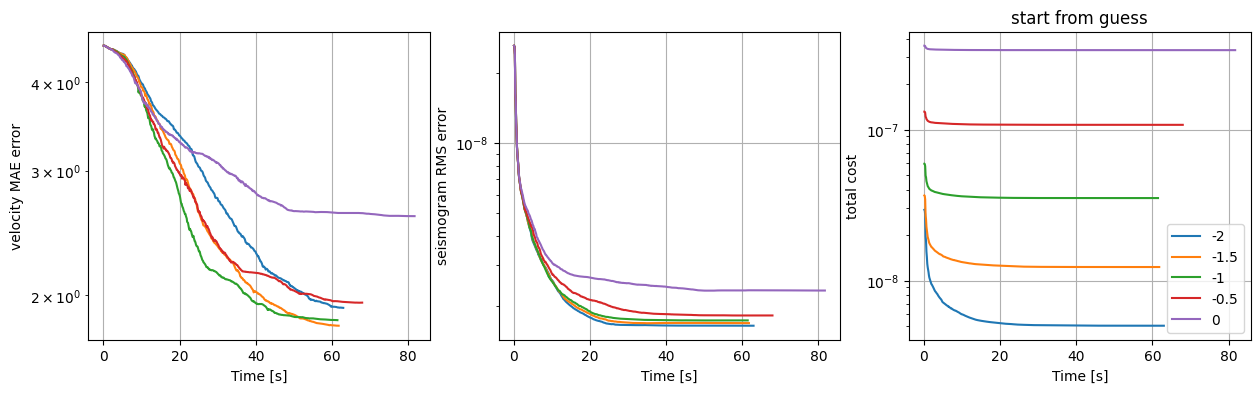

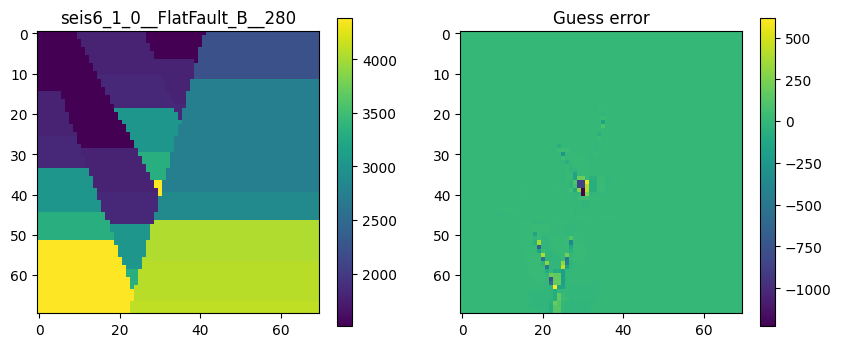

diag 2.4307135443706594e-05
233
500 6820.663887896704
1000 707.6117988652974
1500 123.03097201219025
MAE update:  4.37687002760829
diag 2.4307135443706594e-05
233
500 9344.141733525026
1000 699.0464885430474
1500 237.99075563637436
MAE update:  4.18154598524257
diag 2.4307135443706594e-05
233
500 12484.614956105295
1000 295.7227882993116
1500 53.99428239836585
MAE update:  3.9089926374698543
diag 2.4307135443706594e-05
233
500 1698.523152244304
1000 128.68683809894065
MAE update:  3.067807810595535
diag 2.4307135443706594e-05
233
500 3618.211539520816
MAE update:  2.0439125358935364


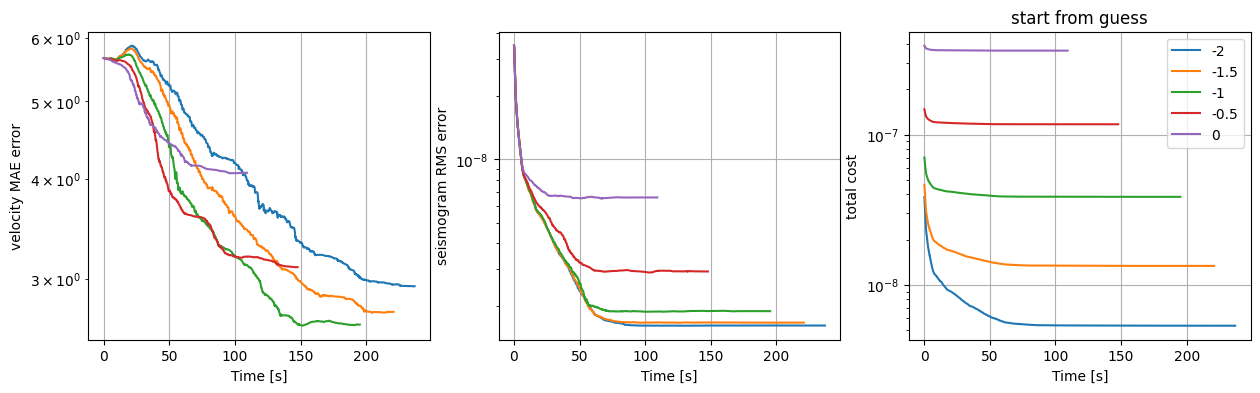

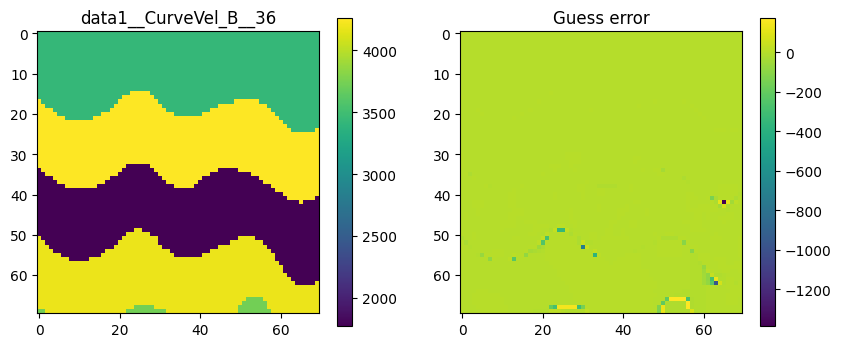

diag 1.5693658344216965e-05
177
500 6060.630286563182
1000 462.1667057806097
MAE update:  2.7702437534798134
diag 1.5693658344216965e-05
177
500 2982.4936842331585
1000 475.15567249258544
MAE update:  2.5960196488752127
diag 1.5693658344216965e-05
177
500 6916.407291693084
1000 41.162359511598694
MAE update:  2.406447503742949
diag 1.5693658344216965e-05
177
500 5224.934383283022
1000 118.38580572516113
MAE update:  2.2591511011694663
diag 1.5693658344216965e-05
177
500 4678.969616203518
1000 53.617067665795275
MAE update:  2.0810874655562186


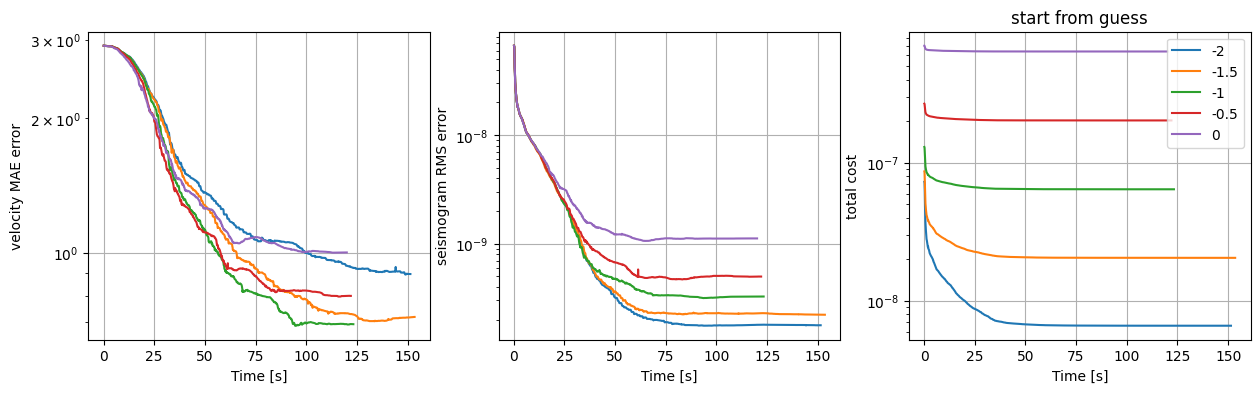

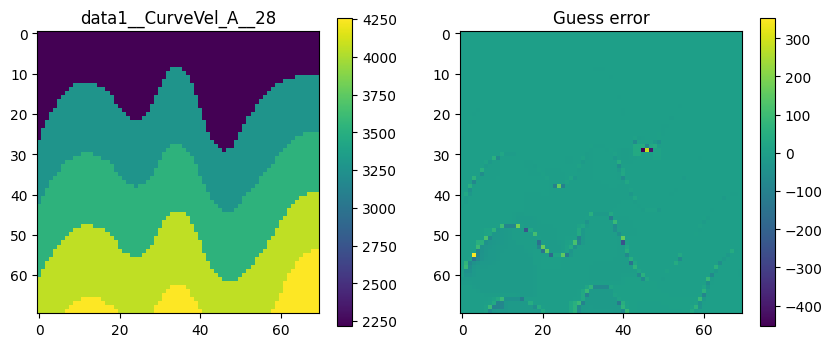

diag 3.7463421649586317e-05
331
500 4534.864860849496
1000 163.69119181454707
MAE update:  4.058130549350987
diag 3.7463421649586317e-05
331
500 1854.9088980375689
1000 113.54263615253936
MAE update:  4.006694903406147
diag 3.7463421649586317e-05
331
500 1698.7596088844673
1000 43.62088568389738
MAE update:  3.9251956080601955
diag 3.7463421649586317e-05
331
500 1664.9779625231906
1000 35.81402994609314
MAE update:  3.6885247672167614
diag 3.7463421649586317e-05
331
500 1350.7770100241564
1000 82.14922495318832
MAE update:  3.5650068620167037


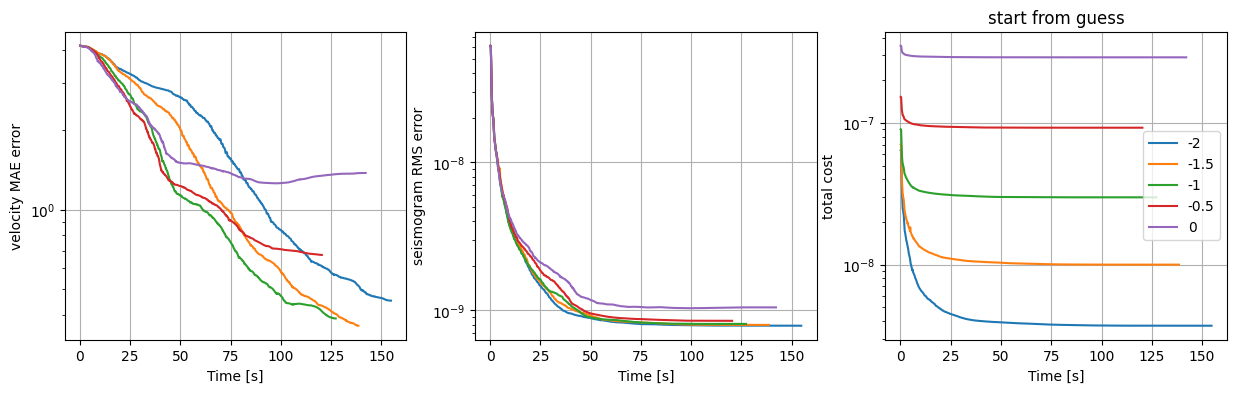

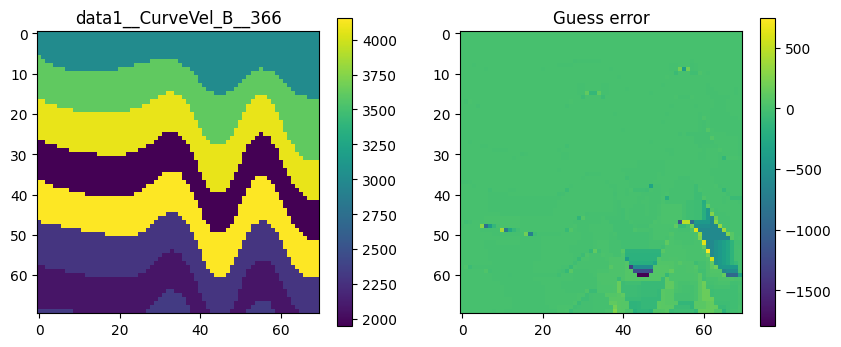

diag 7.577705934711699e-05
556
500 6247.674917311968
1000 9015.205028043027
1500 989.3791198391907
2000 1819.5477593722735
MAE update:  20.18842155859208
diag 7.577705934711699e-05
556
500 3769.166980620942
1000 1599.8707851908891
1500 2270.0120145499914
2000 554.7425699820217
MAE update:  17.466905452278343
diag 7.577705934711699e-05
556
500 4297.972246515778
1000 3527.4709970704753
1500 1567.5513623349295
2000 901.5388777448933
MAE update:  15.613440483194694
diag 7.577705934711699e-05
556
500 3602.0119039468095
1000 1556.7790974291681
1500 784.6772198694409
2000 342.82323593408165
MAE update:  12.094134841124859
diag 7.577705934711699e-05
556
500 2770.493138908611
1000 414.518186647228
1500 95.0696667021366
2000 77.59013897737353
MAE update:  6.665108330414236


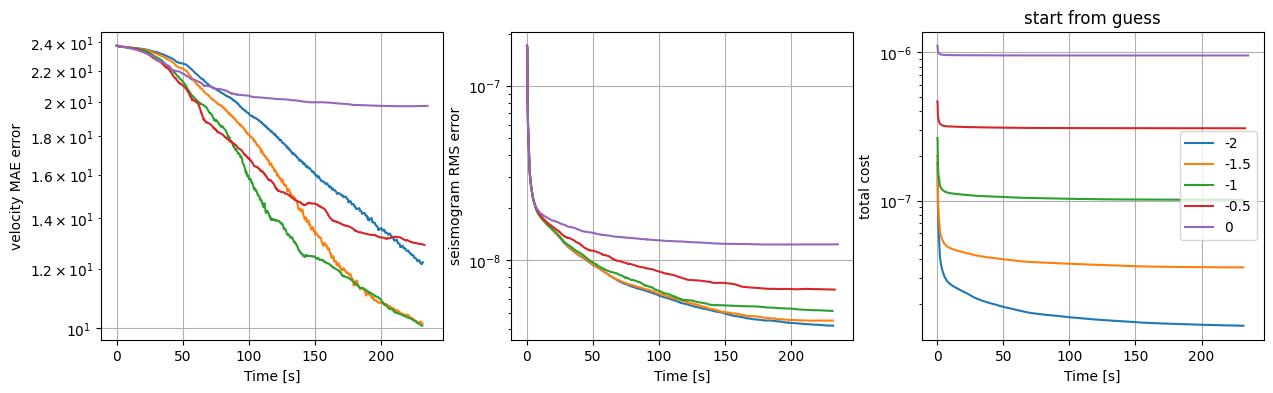

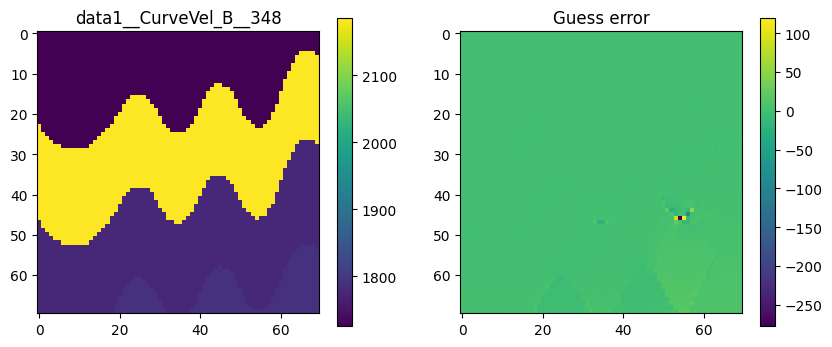

diag 4.6002773353286965e-05
71
MAE update:  1.4303063405278815
diag 4.6002773353286965e-05
71
MAE update:  1.4107274134908905
diag 4.6002773353286965e-05
71
MAE update:  1.3910746939388976
diag 4.6002773353286965e-05
71
MAE update:  1.3730483374177047
diag 4.6002773353286965e-05
71
MAE update:  1.3464689646391825


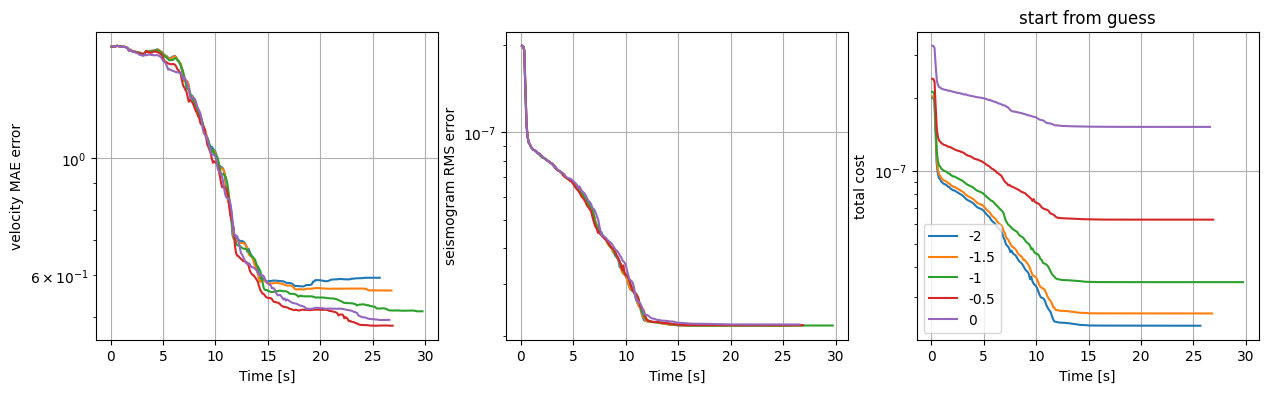

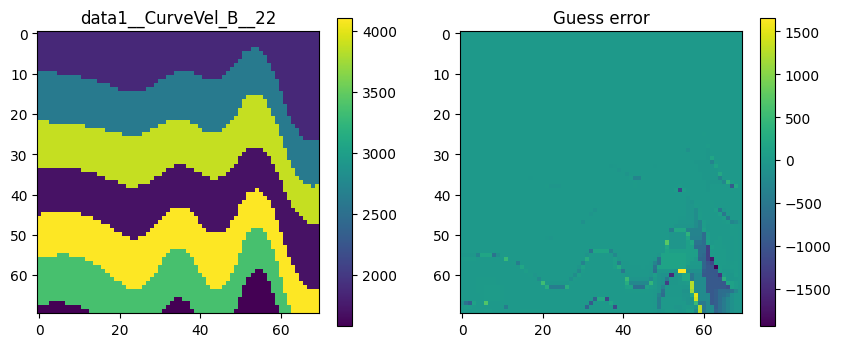

diag 5.347033112123265e-05
621
500 2938.5561678838985
1000 4728.722764798495
1500 265.71556636882656
2000 1872.205804801537
MAE update:  24.667949063345258
diag 5.347033112123265e-05
621
500 3503.541101094918
1000 1361.6842169327788
1500 541.2269806434718
2000 619.3184085392908
MAE update:  19.651582605567267
diag 5.347033112123265e-05
621
500 1703.3649487309428
1000 625.2328921722473
1500 460.8005855031662
2000 732.299508214357
MAE update:  16.104484774333102
diag 5.347033112123265e-05
621
500 4783.107174716186
1000 1277.2691754192347
1500 389.77375125388386
2000 389.2784771154646
MAE update:  13.105024190736687
diag 5.347033112123265e-05
621
500 2085.9288071145384
1000 613.679230393291
1500 511.8431255284432
2000 459.433996994384
MAE update:  8.851735140018834


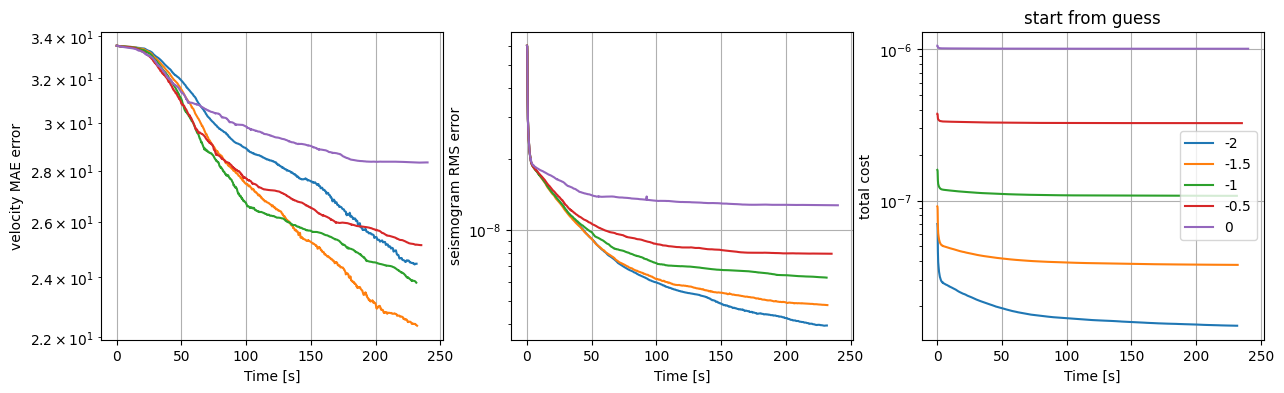

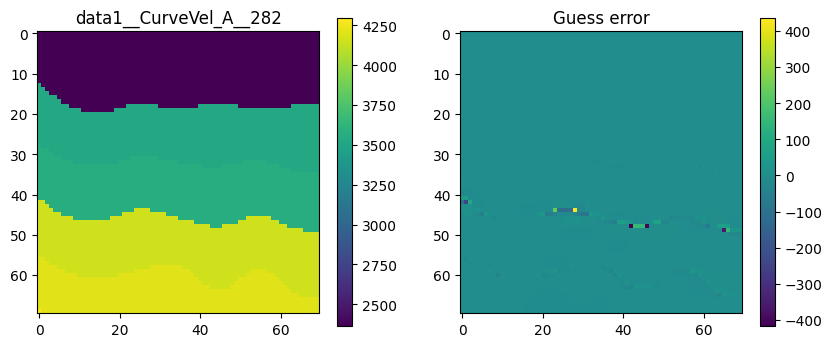

diag 3.294539539637763e-05
195
500 35.52515097441383
MAE update:  1.638158021570791
diag 3.294539539637763e-05
195
MAE update:  1.6354061673395943
diag 3.294539539637763e-05
195
MAE update:  1.6225473946450442
diag 3.294539539637763e-05
195
MAE update:  1.5961424685594268
diag 3.294539539637763e-05
195
MAE update:  1.5573686010956818


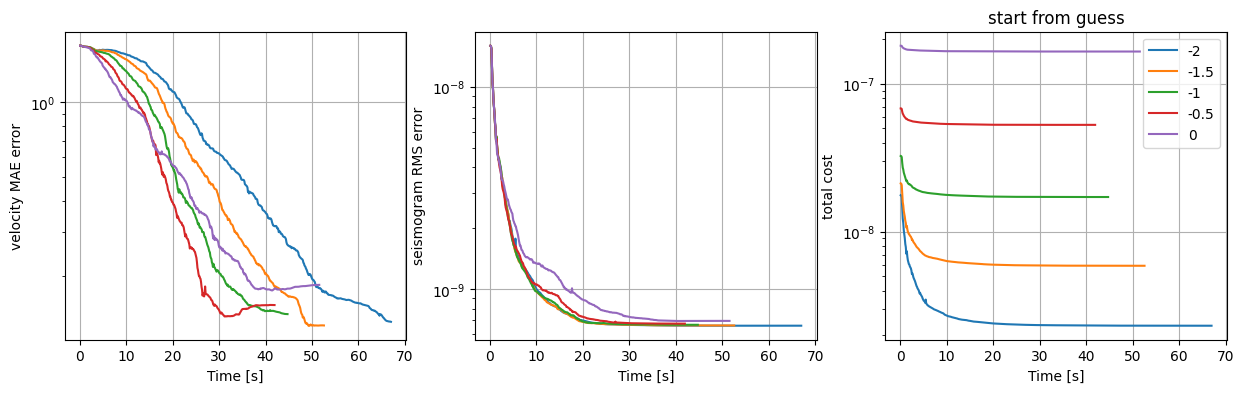

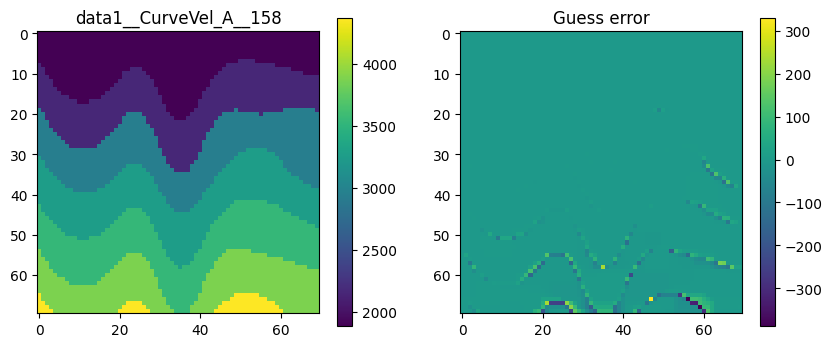

diag 3.0027817144231202e-05
395
500 297.34224323114194
1000 41.86631457574925
MAE update:  4.758442919425615
diag 3.0027817144231202e-05
395
500 357.75586452571133
MAE update:  4.580881356248376
diag 3.0027817144231202e-05
395
500 277.22226585625907
MAE update:  4.29316209486325
diag 3.0027817144231202e-05
395
500 248.0035010047091
MAE update:  3.8764578993187135
diag 3.0027817144231202e-05
395
500 266.4532999504286
MAE update:  3.465671430084403


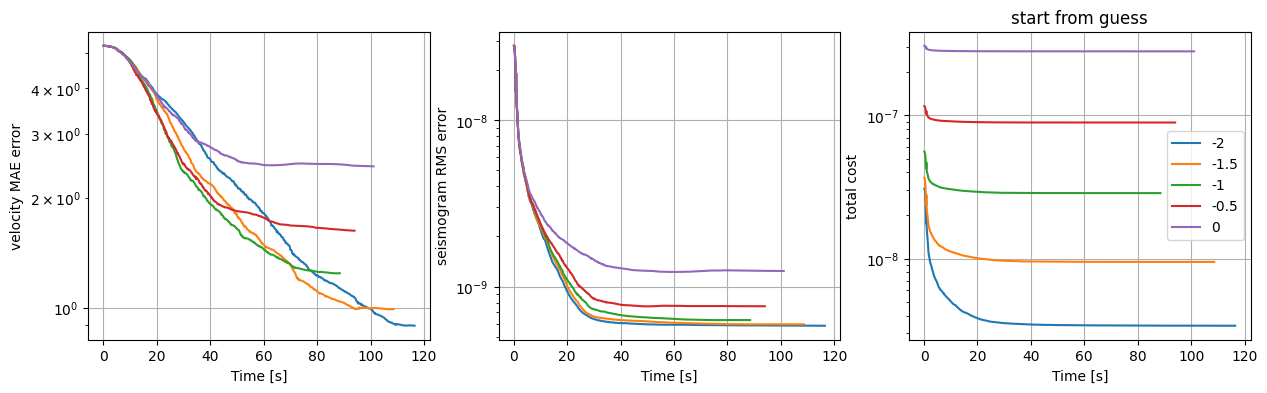

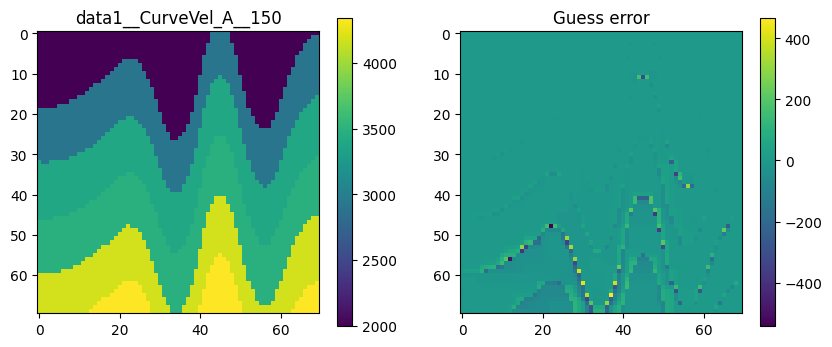

diag 7.066011919060462e-05
637
500 1167.40254030131
1000 1088.3384473166384
1500 155.21293207172204
2000 54.893467781292486
MAE update:  10.090536726184826
diag 7.066011919060462e-05
637
500 2748.896414439279
1000 273.2642641840571
1500 142.74696018197133
2000 116.6575136520809
MAE update:  9.397095634248714
diag 7.066011919060462e-05
637
500 1776.8069884984127
1000 449.81053839906673
1500 127.10591820568798
MAE update:  8.531828554565248
diag 7.066011919060462e-05
637
500 1104.8362073136238
1000 545.5764496013956
1500 85.37726103210846
2000 40.39000870042761
MAE update:  7.714740120696084
diag 7.066011919060462e-05
637
500 3503.4112177094357
1000 318.7676665039092
1500 49.04919541710828
MAE update:  7.3234974952545056


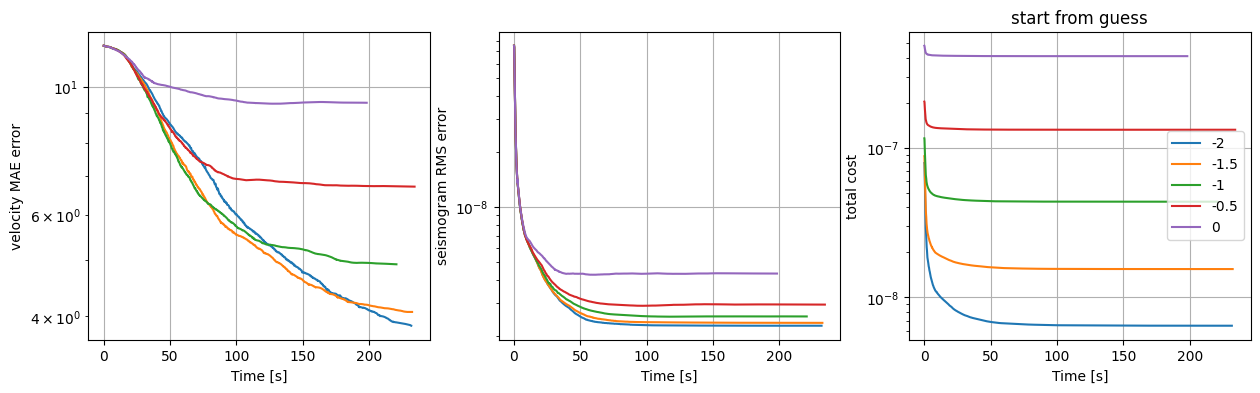

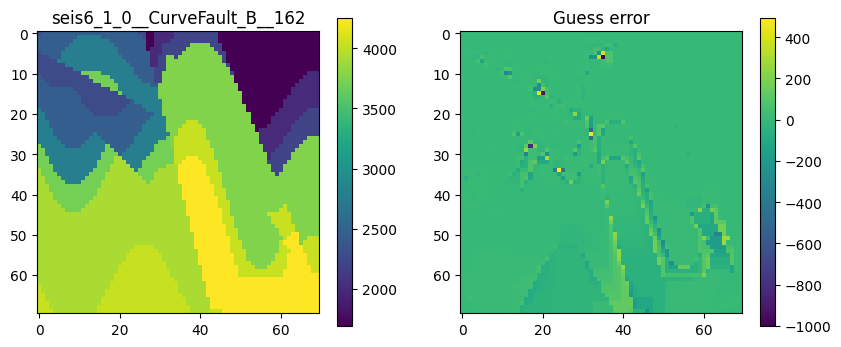

diag 3.204881889392175e-05
644
500 63001.355561274126
1000 20232.974318352233
1500 9001.602613817946
2000 964.5431502013644
MAE update:  11.47875192578703
diag 3.204881889392175e-05
644
500 58806.886273529024
1000 1831.719978139452
1500 611.8316374773053
2000 362.16573338728574
MAE update:  9.574574870795109
diag 3.204881889392175e-05
644
500 12399.398632392184
1000 10283.769296664977
1500 4654.322462510368
2000 478.21987775190536
MAE update:  7.735018091285262
diag 3.204881889392175e-05
644
500 70105.19531598472
1000 4413.077130076741
1500 1034.3057774884883
2000 507.22060593544586
MAE update:  6.162005702674869
diag 3.204881889392175e-05
644
500 16464.80528048437
1000 2192.691077342221
1500 633.2685116254974
2000 169.31306725057215
MAE update:  5.092347723062237


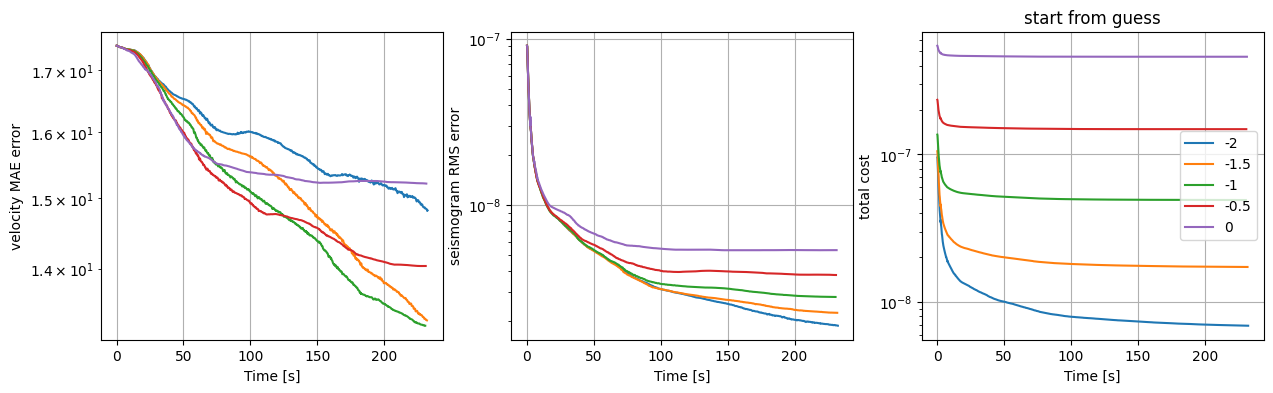

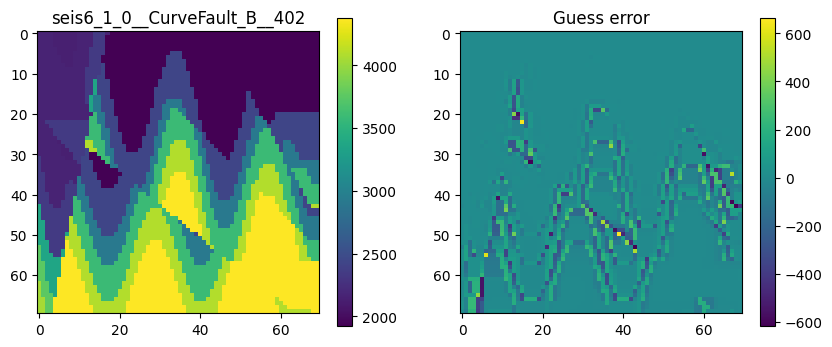

diag 5.223279277025669e-05
1228
500 2310.4376827241294
1000 1375.3696779943211
1500 3270.555076184951
2000 7357.4807717701215
MAE update:  24.73251797932739
diag 5.223279277025669e-05
1228
500 5529.52979839565
1000 1564.8898582953586
1500 929.5131039395377
2000 478.0099835135569
MAE update:  22.620938390015485
diag 5.223279277025669e-05
1228
500 2959.306136227239
1000 1490.2014384851432
1500 1531.027785830817
2000 257.2766309526735
MAE update:  20.63238004510468
diag 5.223279277025669e-05
1228
500 6960.022784628217
1000 663.989060251243
1500 1046.3543465468265
2000 379.4496821023236
MAE update:  18.58051776587331
diag 5.223279277025669e-05
1228
500 2099.2950587917876
1000 3676.6195847112263
1500 1657.640623714064
2000 950.9957087754303
MAE update:  15.848286578343153


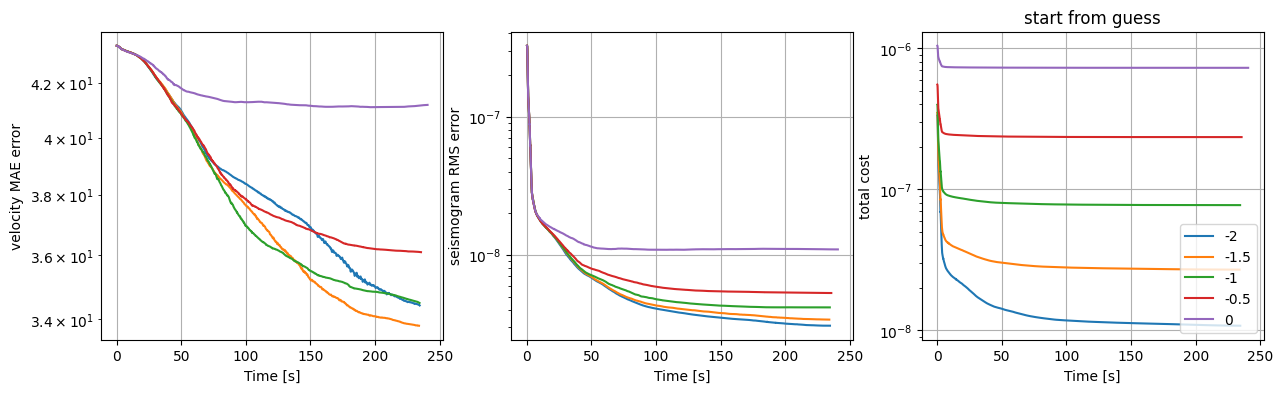

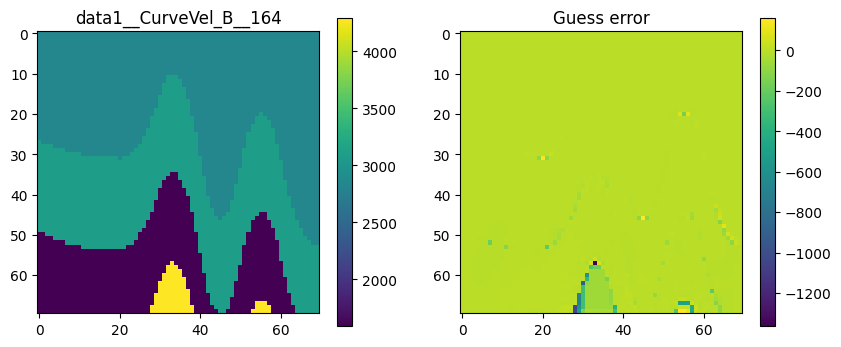

diag 6.392726148994583e-05
362
500 7058.351543816663
1000 256.7266165996435
1500 299.6823406227917
MAE update:  5.555640986647647
diag 6.392726148994583e-05
362
500 3901.152420950748
1000 1332.483869313771
1500 304.656542007443
MAE update:  5.511296561003465
diag 6.392726148994583e-05
362
500 5682.127296645231
1000 671.486113004502
MAE update:  5.390975013671221
diag 6.392726148994583e-05
362
500 5589.161334532883
1000 473.50457393745216
MAE update:  5.091377774407682
diag 6.392726148994583e-05
362
500 5087.876708670651
1000 181.07711454297456
MAE update:  4.423397662737768


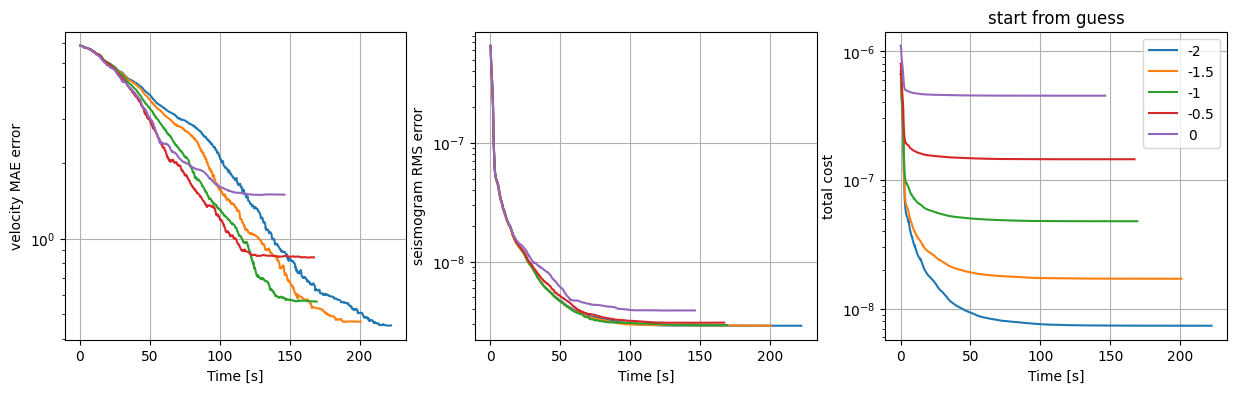

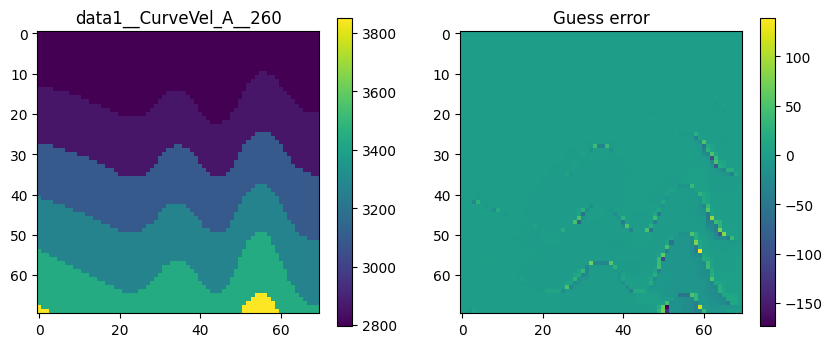

diag 1.3392831089296002e-05
327
500 216.5226156699952
MAE update:  2.3185281293404945
diag 1.3392831089296002e-05
327
500 137.73334772087827
MAE update:  2.277472626699903
diag 1.3392831089296002e-05
327
500 164.53593800585634
MAE update:  2.1931287119614327
diag 1.3392831089296002e-05
327
500 80.48047774371881
MAE update:  1.957869955264754
diag 1.3392831089296002e-05
327
500 92.9163845063121
MAE update:  1.986042483318531


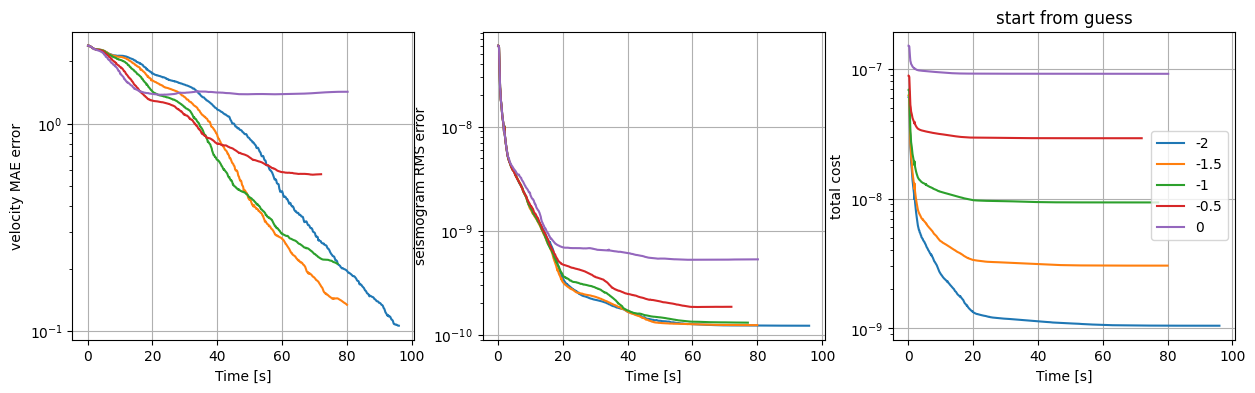

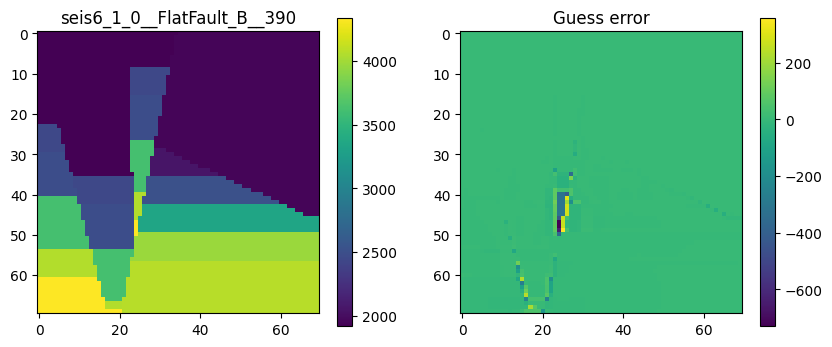

diag 1.856097668303184e-05
186
500 313.3429056188677
1000 57.378188717018624
MAE update:  3.961894112808531
diag 1.856097668303184e-05
186
500 3959.189892463157
MAE update:  3.780439066538865
diag 1.856097668303184e-05
186
500 1465.6617555050861
MAE update:  3.6257380210913492
diag 1.856097668303184e-05
186
500 1572.0408738863307
MAE update:  3.23711185100788
diag 1.856097668303184e-05
186
500 375.66224730700264
MAE update:  2.212400266975368


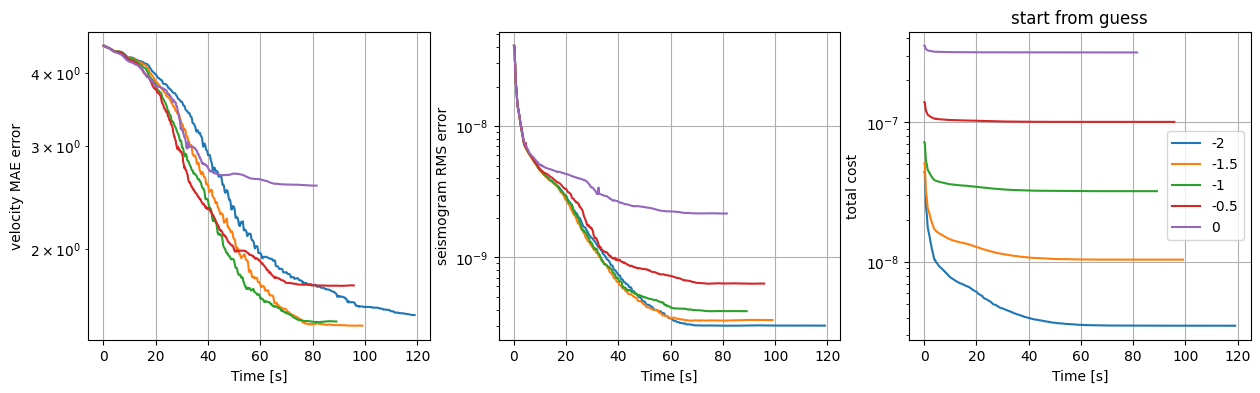

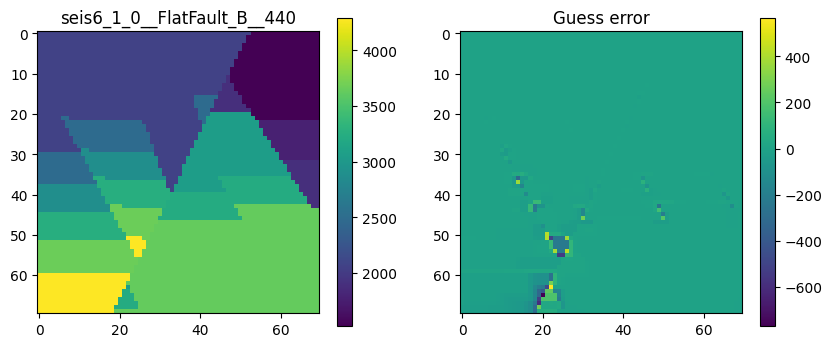

diag 2.53801201172096e-05
270
500 724.6666988242587
1000 118.58414741725933
1500 20.71006571542049
MAE update:  6.504638222121147
diag 2.53801201172096e-05
270
500 1379.803028296391
1000 435.3730219384944
1500 30.070502782984676
MAE update:  5.814698802641786
diag 2.53801201172096e-05
270
500 1932.6778667889107
1000 38.03278735223576
MAE update:  4.459918306295856
diag 2.53801201172096e-05
270
500 909.0488382005971
1000 64.77761184035141
MAE update:  3.5790152357872724
diag 2.53801201172096e-05
270
500 1428.6675974679454
1000 55.09898625856099
MAE update:  2.685291267667926


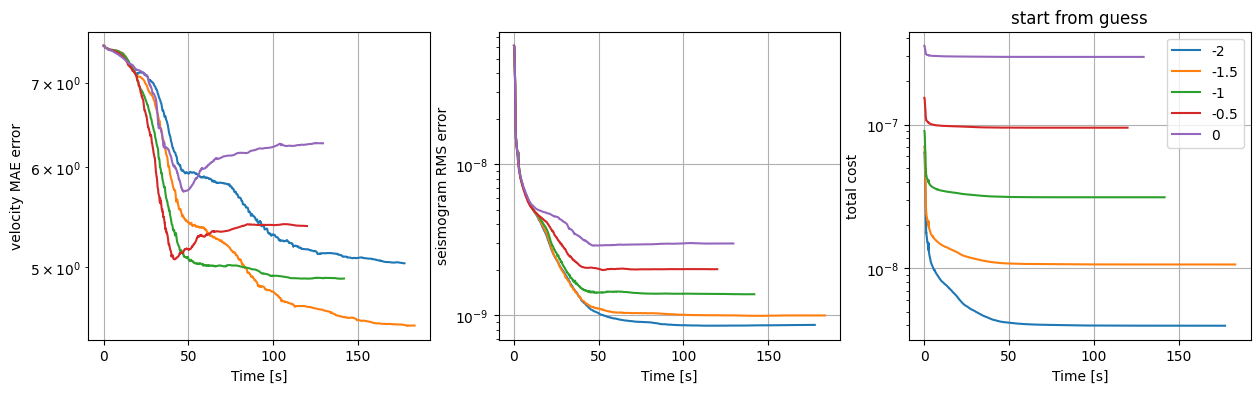

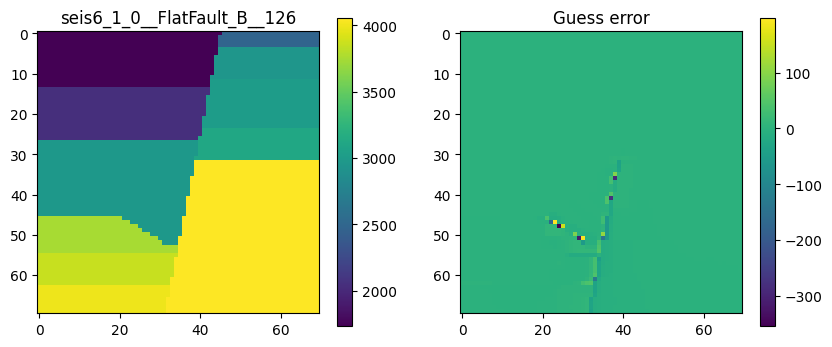

diag 4.857850174215577e-05
117
500 27.90405578990928
MAE update:  1.6936610001381598
diag 4.857850174215577e-05
117
MAE update:  1.6959835344587162
diag 4.857850174215577e-05
117
MAE update:  1.6934466888914816
diag 4.857850174215577e-05
117
MAE update:  1.688021464838642
diag 4.857850174215577e-05
117
MAE update:  1.6569842366002405


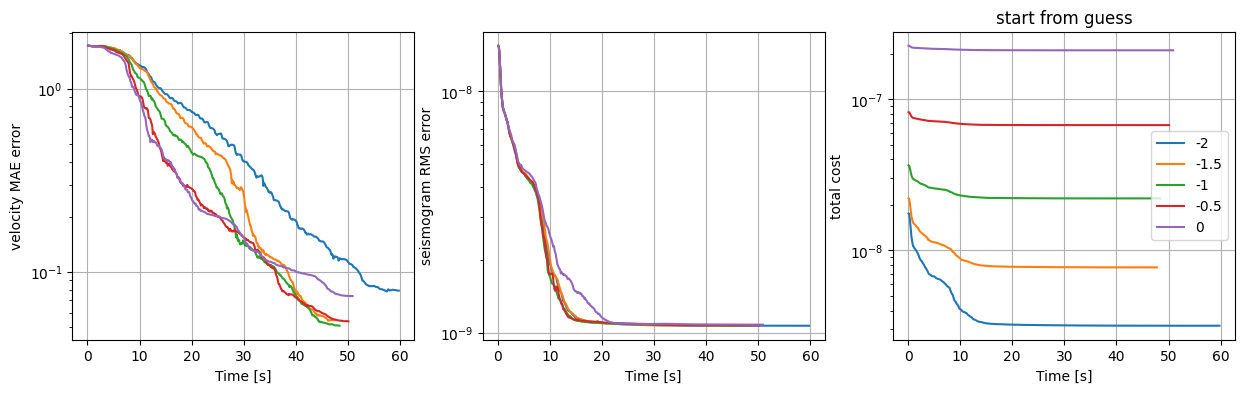

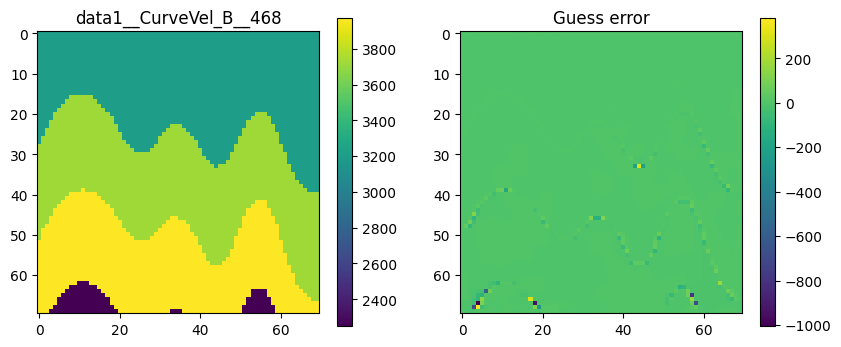

diag 1.6231596288783555e-05
279
500 275.28967012840326
1000 1587.6953356011093
MAE update:  2.937250162994049
diag 1.6231596288783555e-05
279
500 2591.177158438783
1000 1210.1024728478808
MAE update:  2.8373909899343652
diag 1.6231596288783555e-05
279
500 11205.856164254354
1000 357.5892849683937
MAE update:  2.779205621220498
diag 1.6231596288783555e-05
279
500 6020.076838492943
MAE update:  2.709167541482272
diag 1.6231596288783555e-05
279
500 6175.169584333732
1000 235.4684815321479
MAE update:  2.5263074154624072


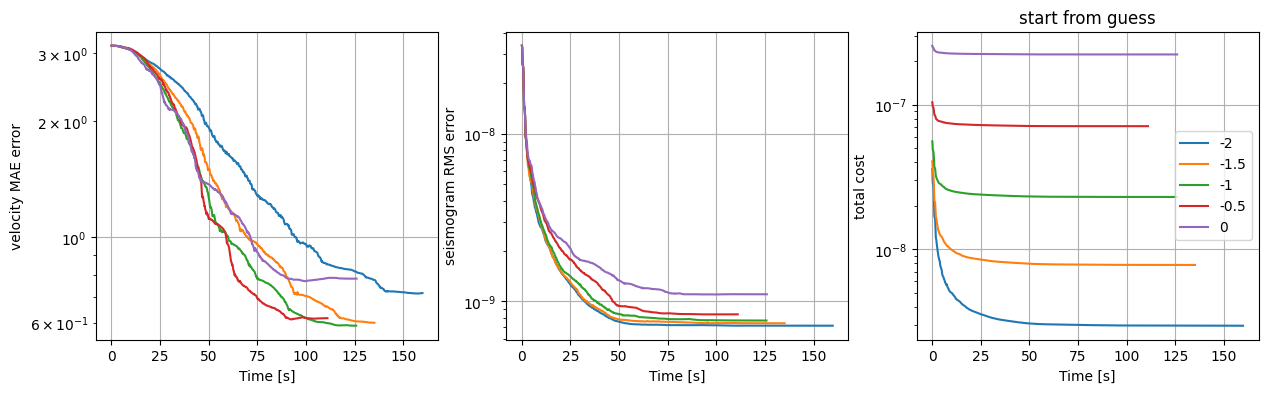

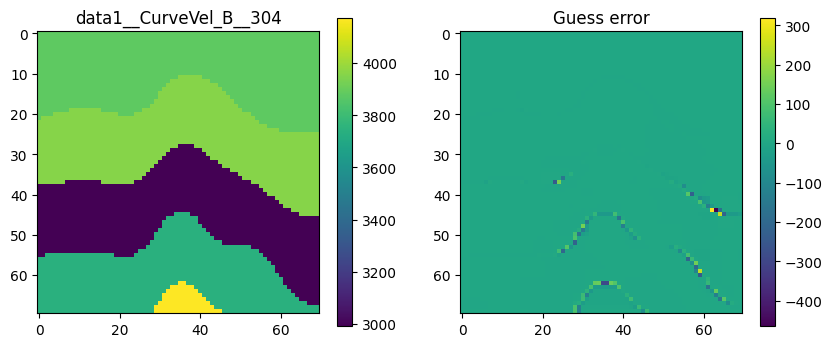

diag 1.421527461223842e-05
180
500 4583.732138377264
MAE update:  2.3166206843478574
diag 1.421527461223842e-05
180
500 4212.213287572246
MAE update:  2.309112693903385
diag 1.421527461223842e-05
180
500 977.0855941746879
MAE update:  2.2606768379148177
diag 1.421527461223842e-05
180
500 173.8642420139735
MAE update:  2.2090233129010737
diag 1.421527461223842e-05
180
500 946.9403789576321
MAE update:  2.153099112058819


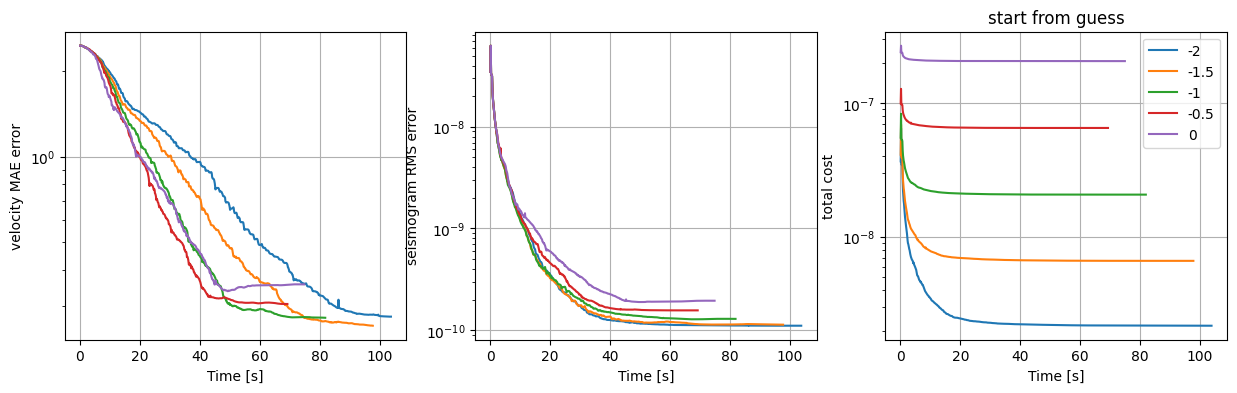

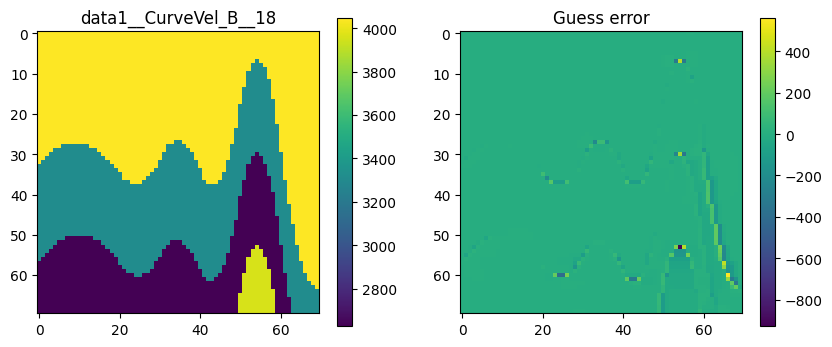

diag 4.3454275213626005e-05
345
500 85361.45066875899
1000 2858.378857907616
1500 50.9573337084911
2000 3718.5723880441697
MAE update:  6.476762266941408
diag 4.3454275213626005e-05
345
500 38764.66370238666
1000 43895.510277422785
1500 7325.883156145135
2000 927.4263960060414
MAE update:  6.502611542880179
diag 4.3454275213626005e-05
345
500 42418.241068891555
1000 3859.819089319304
1500 5687.3252752145745
2000 631.4234373843879
MAE update:  6.525747677087298
diag 4.3454275213626005e-05
345
500 16066.204749932864
1000 7665.684390622399
1500 1438.1789945709083
2000 560.9604345866071
MAE update:  6.051860648074408
diag 4.3454275213626005e-05
345
500 13820.040953710484
1000 15590.787046106838
1500 4906.566863910973
MAE update:  4.762296916058917


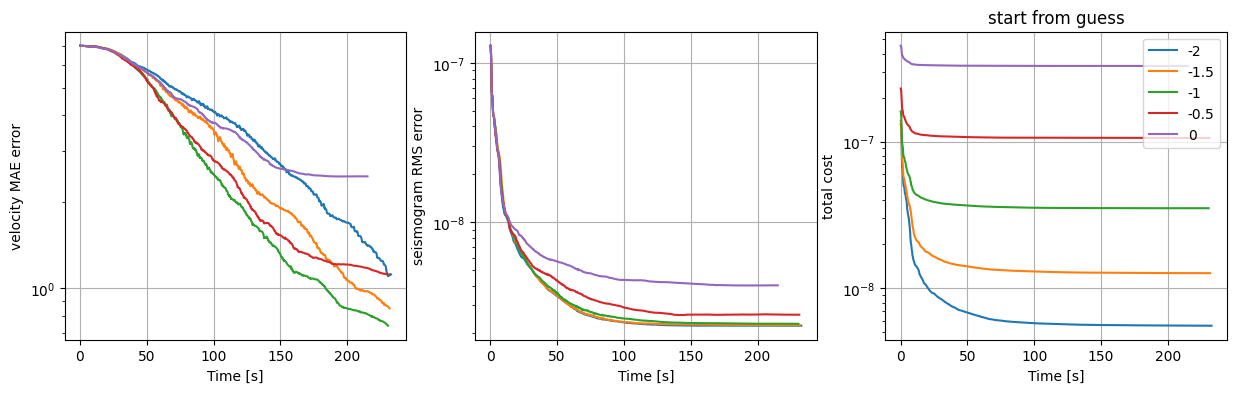

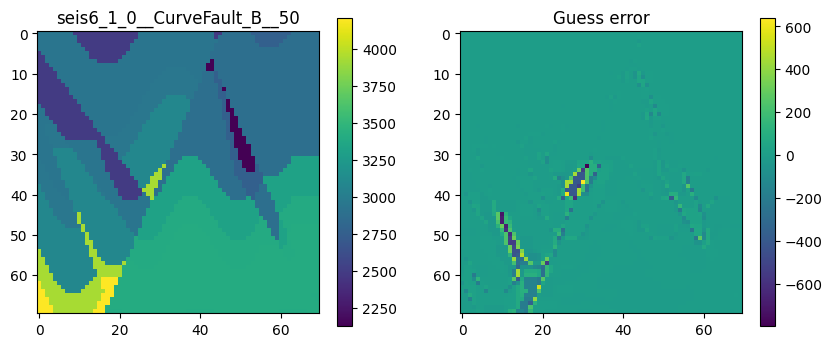

diag 2.2465213250283262e-05
541
500 4929.351832452642
1000 1401.8859076111744
1500 2251.1768469557464
2000 459.2350182428644
MAE update:  9.06561124826694
diag 2.2465213250283262e-05
541
500 1876.395846117421
1000 959.586138564232
1500 544.4671831636742
2000 553.4683090876869
MAE update:  7.435301549835488
diag 2.2465213250283262e-05
541
500 1352.250762775656
1000 6453.255136530583
1500 730.3889415153185
2000 157.5858294426757
MAE update:  5.7343651045138975
diag 2.2465213250283262e-05
541
500 4174.6351866038585
1000 600.3820779821119
1500 47.34093359753373
2000 107.77574035793732
MAE update:  4.095805824954946
diag 2.2465213250283262e-05
541
500 2581.7087941458253
1000 349.83392043959736
1500 290.3674581314274
MAE update:  3.0644838765600024


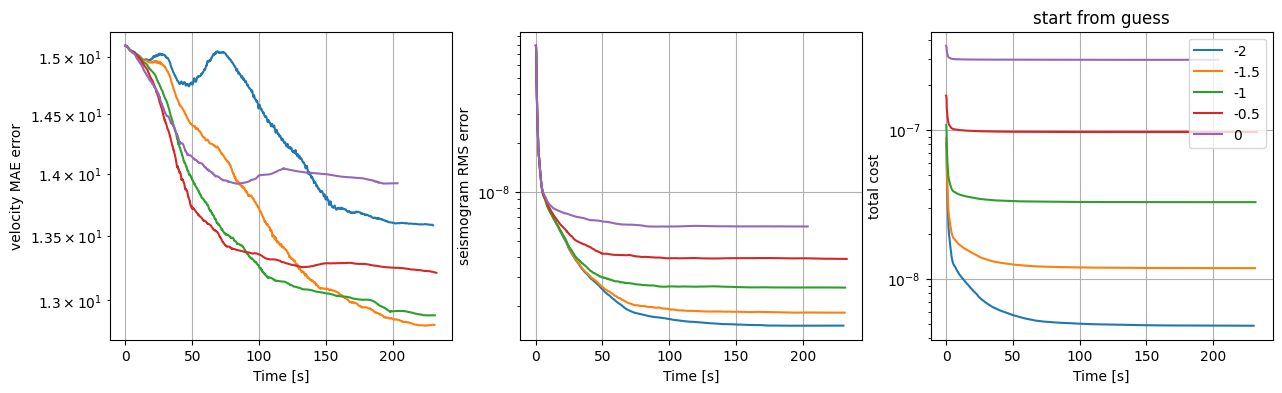

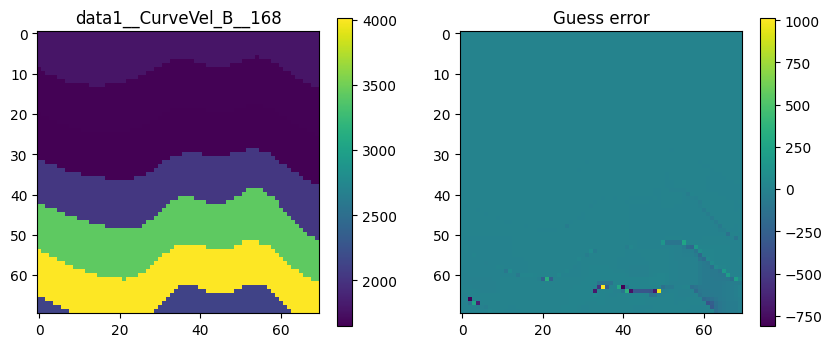

diag 2.091853358721927e-05
286
500 6216.276452372287
1000 373.1577971392536
MAE update:  5.748803511207699
diag 2.091853358721927e-05
286
500 3502.5227329999193
1000 316.7729682571752
MAE update:  5.786452224632072
diag 2.091853358721927e-05
286
500 1312.9843127986128
1000 25.17965747535572
MAE update:  5.732957510594697
diag 2.091853358721927e-05
286
500 1548.3521501604646
1000 19.266334714752098
MAE update:  5.554445190768453
diag 2.091853358721927e-05
286
500 915.1741874455935
1000 56.94006512687076
MAE update:  5.119832502172448


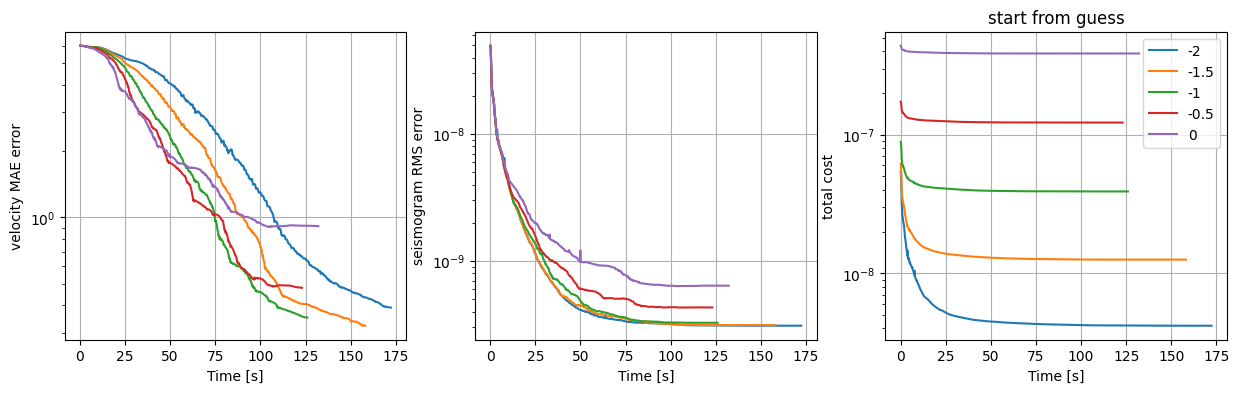

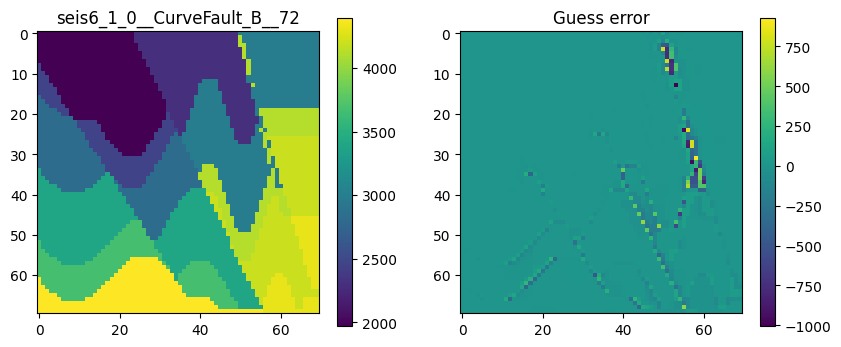

diag 2.743103477358802e-05
602
500 11078.05653482756
1000 3598.164778756202
1500 35576.02252707222
2000 43568.57183613399
MAE update:  10.982318916294572
diag 2.743103477358802e-05
602
500 10053.94304174612
1000 107802.56571798853
1500 3587.54275900897
2000 18260.539699545774
MAE update:  10.044755693122259
diag 2.743103477358802e-05
602
500 32029.321254962313
1000 15511.642711528379
1500 6655.6020247974575
2000 14961.639689602782
MAE update:  8.379565190128714
diag 2.743103477358802e-05
602
500 25276.380594511687
1000 42369.7869422473
1500 16715.180589613792
2000 1148.9800344355363
MAE update:  7.075094957363597
diag 2.743103477358802e-05
602
500 7076.109907203694
1000 8261.819380652512
1500 21095.365665703976
2000 1868.9655671676628
MAE update:  6.49141233355946


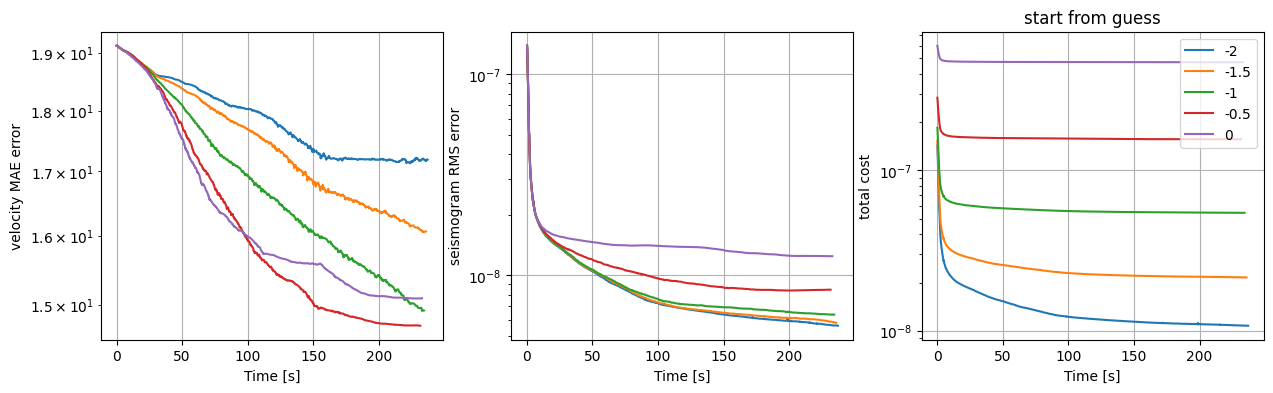

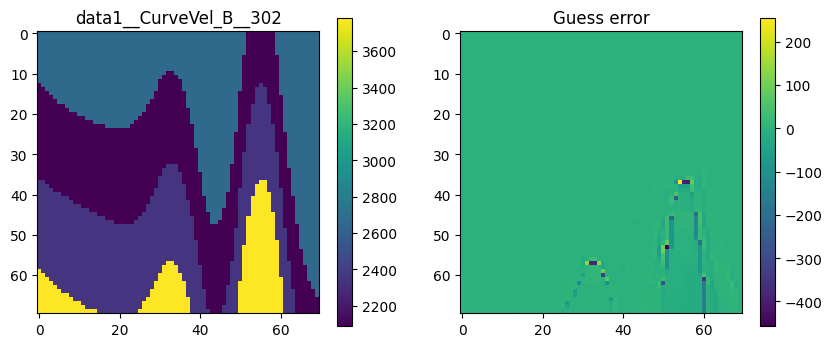

diag 1.8890848024099626e-05
259
500 4104.629973805855
MAE update:  3.250140216385931
diag 1.8890848024099626e-05
259
500 874.6100433115452
MAE update:  3.243197172391852
diag 1.8890848024099626e-05
259
500 860.0777022063442
MAE update:  3.2234845662395633
diag 1.8890848024099626e-05
259
500 498.6739103297451
MAE update:  3.154970376215519
diag 1.8890848024099626e-05
259
500 1968.4899133042868
MAE update:  2.9301786999440416


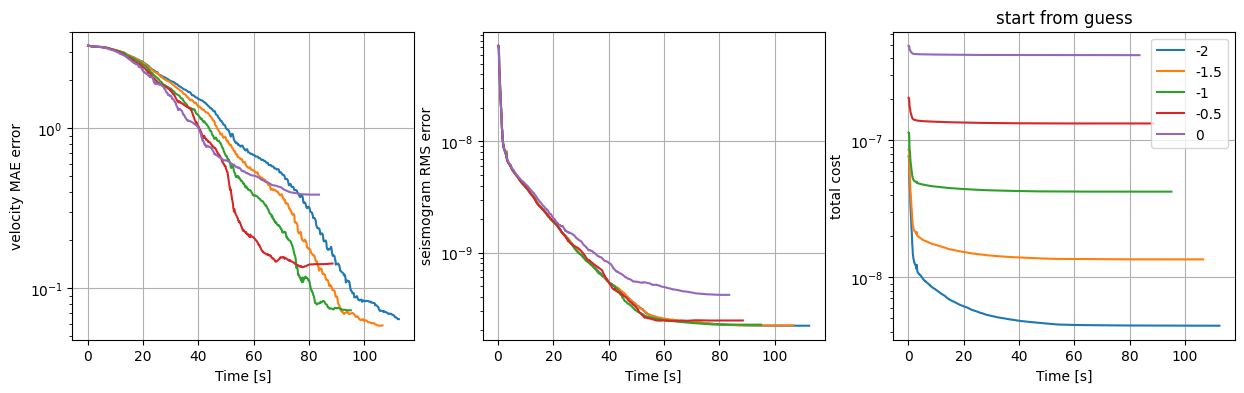

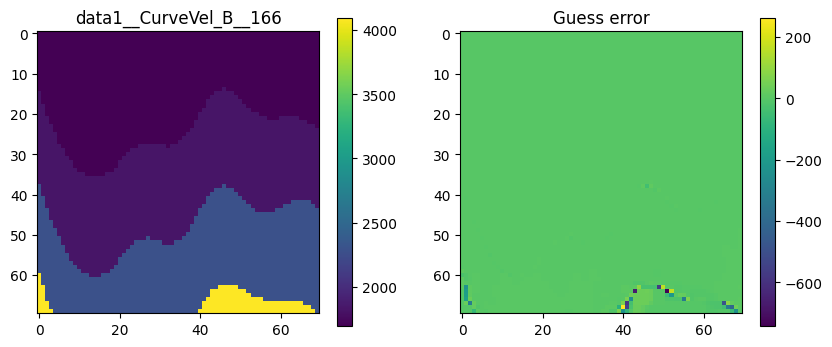

diag 4.621140043100564e-05
164
500 178.25692328359662
MAE update:  2.3876256483727105
diag 4.621140043100564e-05
164
500 258.6925741653701
MAE update:  2.3874041099542787
diag 4.621140043100564e-05
164
500 742.2828175104044
MAE update:  2.384589296686749
diag 4.621140043100564e-05
164
500 414.58435389555166
MAE update:  2.3766301015320646
diag 4.621140043100564e-05
164
500 155.061141346557
MAE update:  2.3447980221686233


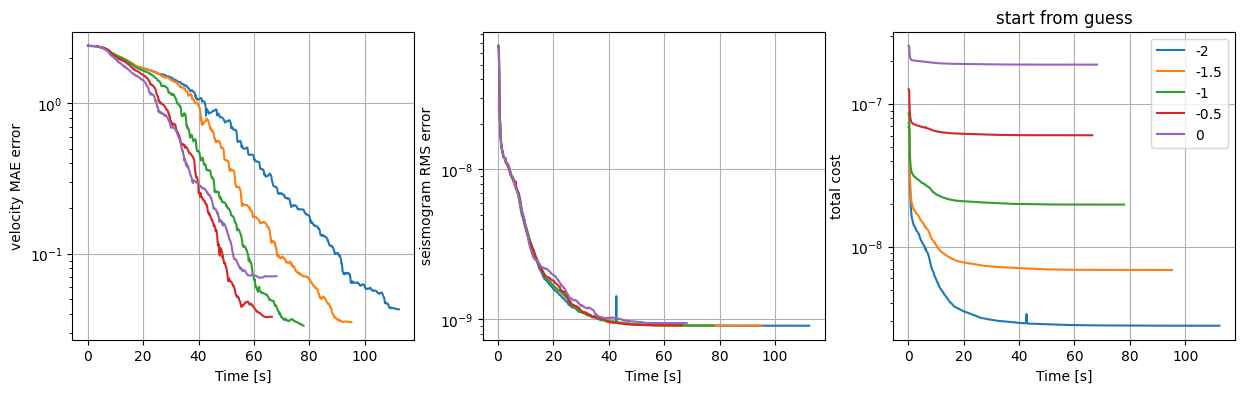

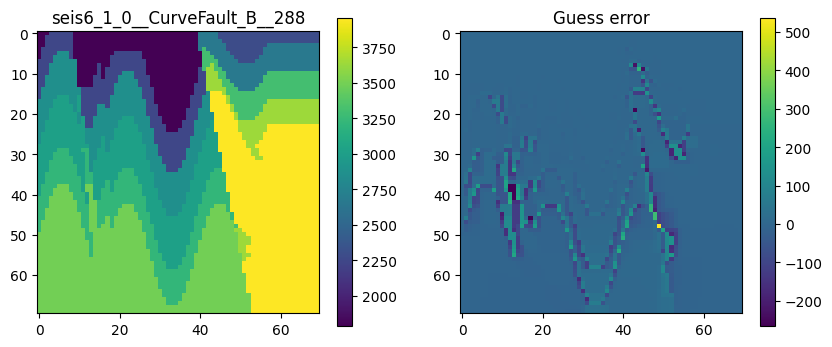

diag 2.0234342627009348e-05
701
500 897.321136186861
1000 565.0768311202695
1500 189.68536359603502
2000 150.75441937723102
MAE update:  10.668844313906032
diag 2.0234342627009348e-05
701
500 3196.7794056526304
1000 389.05178497214143
1500 38.64837067661867
MAE update:  9.274651812084658
diag 2.0234342627009348e-05
701
500 1101.534229570237
1000 477.79629880505684
1500 40.23089496552417
MAE update:  8.038997454884433
diag 2.0234342627009348e-05
701
500 1120.7202895975759
1000 431.7382261122201
MAE update:  7.073507931765446
diag 2.0234342627009348e-05
701
500 1138.1144994864353
1000 681.7122940769192
1500 48.48123275386213
MAE update:  6.135197701084889


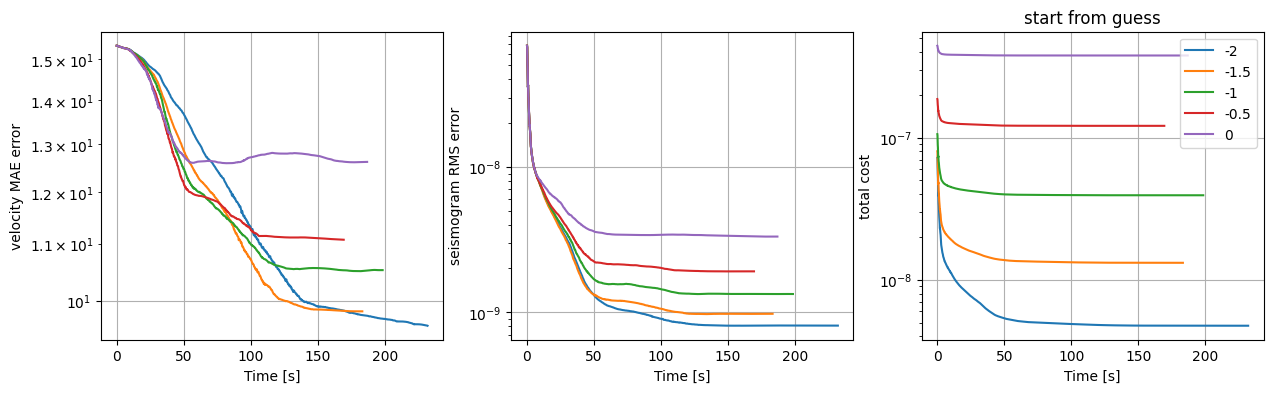

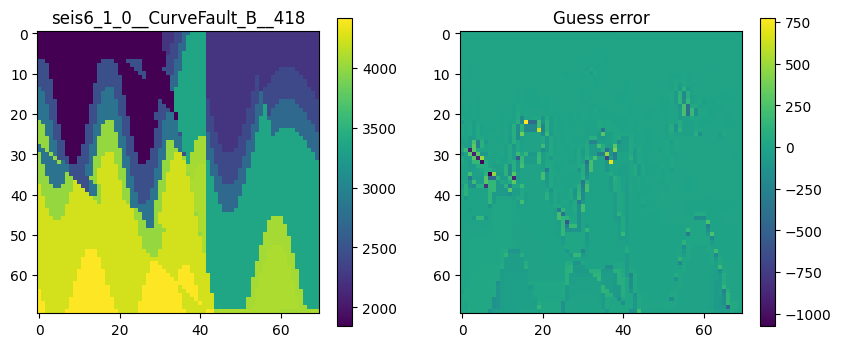

diag 2.5321623670085848e-05
793
500 6307.4779352989935
1000 1815.5954768211864
1500 963.2239192091295
2000 721.0869788792523
MAE update:  14.877079848635509
diag 2.5321623670085848e-05
793
500 5528.2682331544165
1000 2230.578174378124
1500 568.7934300397675
2000 586.8649820536654
MAE update:  12.899840419577654
diag 2.5321623670085848e-05
793
500 2638.7210386920665
1000 1396.4969276787747
1500 455.3157216283067
2000 634.2255821259002
MAE update:  10.878047319577698
diag 2.5321623670085848e-05
793
500 1925.1925069979998
1000 794.5282995145201
1500 296.63914411237914
2000 83.49815559620151
MAE update:  8.403251645439099
diag 2.5321623670085848e-05
793
500 1876.025333781237
1000 1181.6443169412719
1500 98.58558004804118
2000 62.038276307565575
MAE update:  6.920652109339522


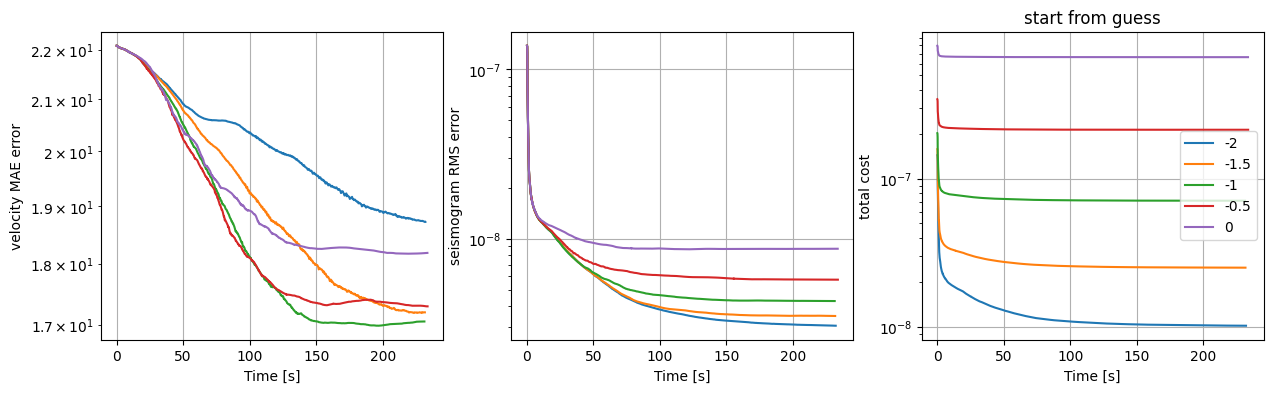

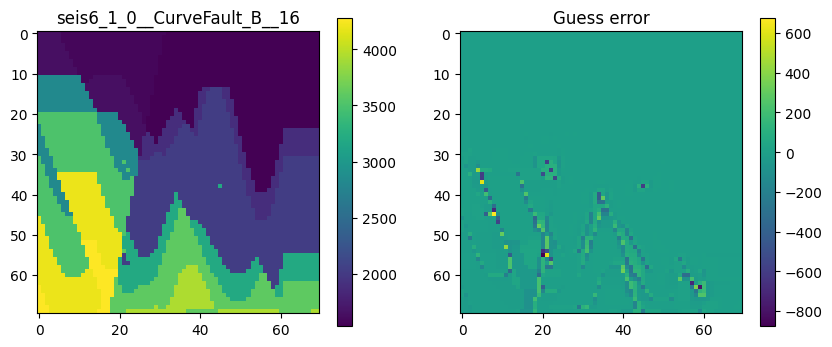

diag 5.8478229812196845e-05
625
500 3852.8713184009016
1000 2555.8390299360785
1500 1082.9420871240652
2000 66.86278051727857
MAE update:  12.429304577568326
diag 5.8478229812196845e-05
625
500 1655.8920262424783
1000 574.7367724207792
1500 246.55834948015922
2000 76.73510775293254
MAE update:  10.50205989517723
diag 5.8478229812196845e-05
625
500 2660.1521286009634
1000 376.7289644302463
1500 170.9569392717998
2000 78.27551837324512
MAE update:  9.158180359920044
diag 5.8478229812196845e-05
625
500 3214.940157949872
1000 312.22166546479025
1500 29.542908829315284
2000 56.549021967927395
MAE update:  8.217003769364979
diag 5.8478229812196845e-05
625
500 3564.2962387380544
1000 188.06186683328596
1500 55.94770065630291
MAE update:  7.207881547039124


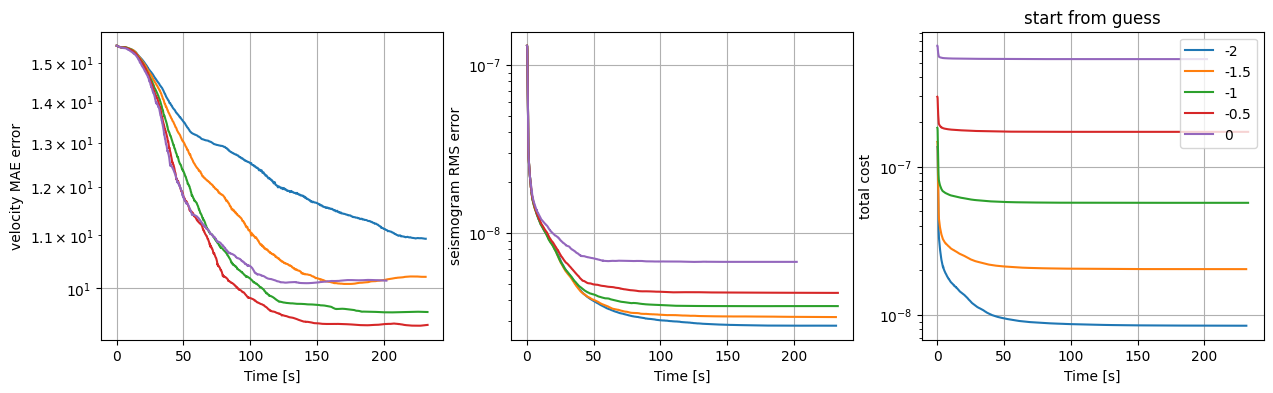

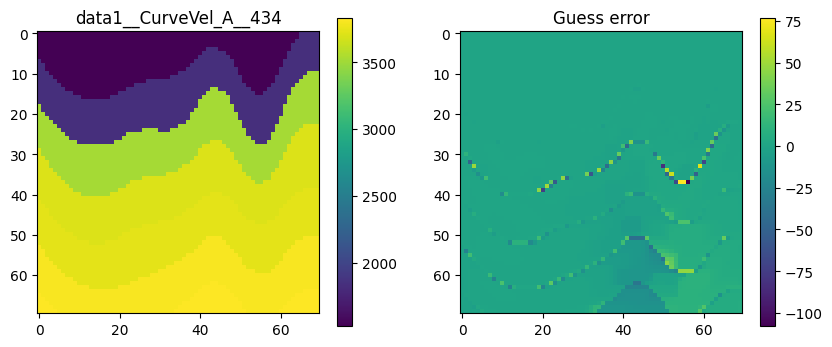

diag 1.8233398714618755e-05
224
MAE update:  1.8694938437702755
diag 1.8233398714618755e-05
224
MAE update:  1.4982394415277642
diag 1.8233398714618755e-05
224
MAE update:  1.2502254775085355
diag 1.8233398714618755e-05
224
MAE update:  1.0727159962259498
diag 1.8233398714618755e-05
224
MAE update:  0.970110225985534


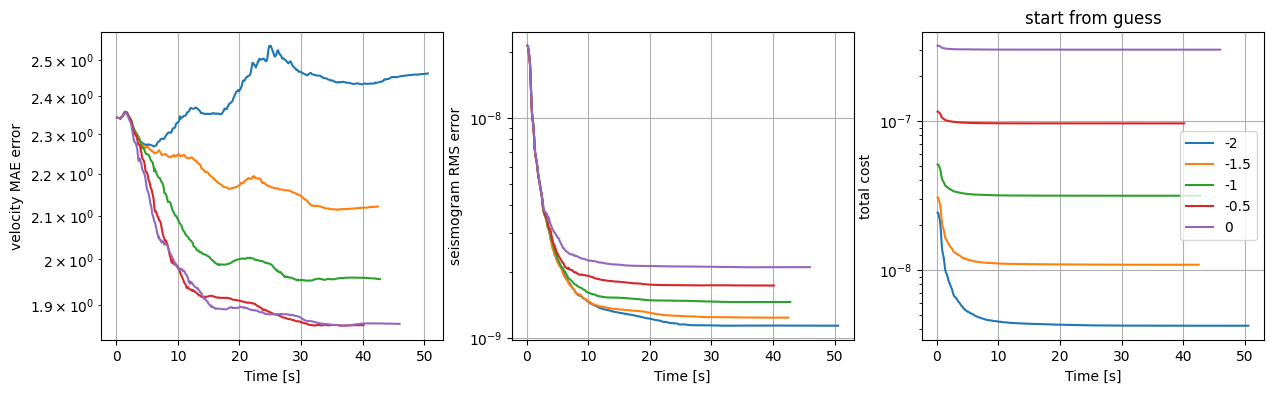

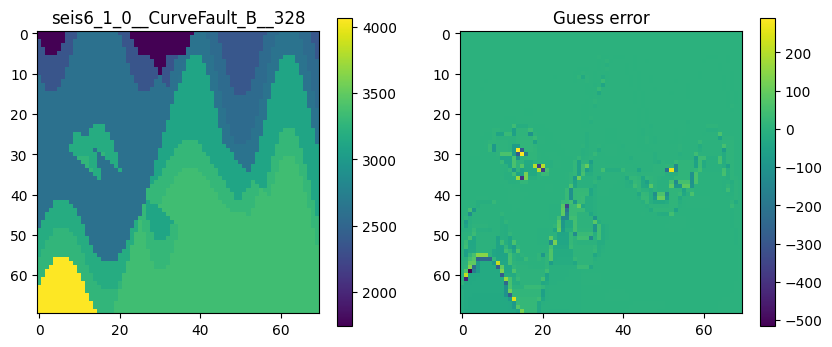

diag 1.961570339625213e-05
519
500 1126.856804081172
1000 336.97654513594244
1500 80.54123282552024
MAE update:  5.992639393208609
diag 1.961570339625213e-05
519
500 784.5200262997233
1000 208.32737992970445
1500 25.538355482074298
MAE update:  5.516307252470293
diag 1.961570339625213e-05
519
500 1656.7361160040136
1000 223.95788688098227
MAE update:  4.999087281074959
diag 1.961570339625213e-05
519
500 1419.08453425446
1000 50.142221969566975
MAE update:  4.396235453604446
diag 1.961570339625213e-05
519
500 708.5649632471059
1000 42.9683786708309
MAE update:  3.51189969829762


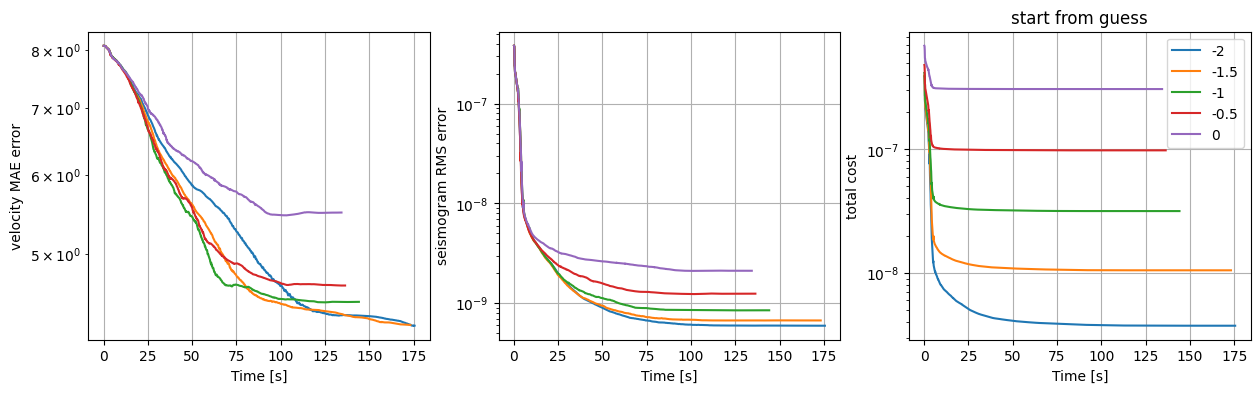

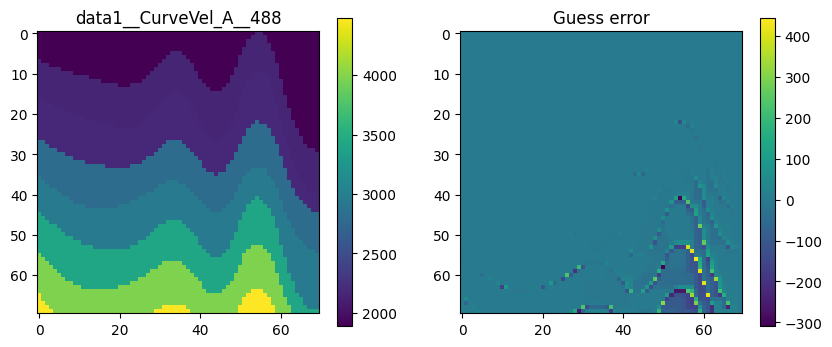

diag 2.0445206216024754e-05
532
500 552.9237012762594
1000 28.52191179314443
1500 58.51448271439049
MAE update:  6.982598968137477
diag 2.0445206216024754e-05
532
500 604.1281980717214
1000 75.50639385787315
MAE update:  6.894761672074607
diag 2.0445206216024754e-05
532
500 228.94377852583273
1000 97.99277188496025
MAE update:  6.679357127729231
diag 2.0445206216024754e-05
532
500 537.7922586437281
1000 67.21823247424435
MAE update:  6.250723490440246
diag 2.0445206216024754e-05
532
500 886.0443700180945
1000 74.03540864514703
1500 21.77637351477297
MAE update:  5.472996502790244


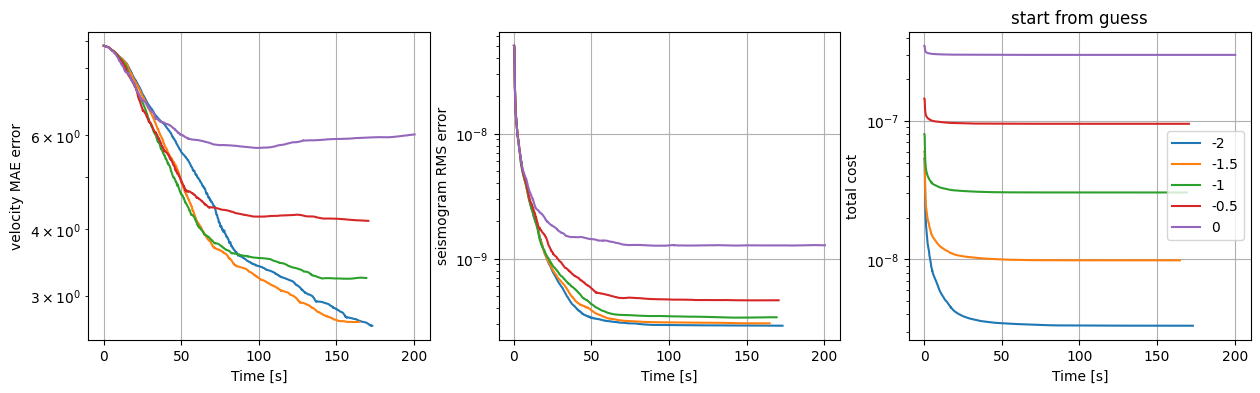

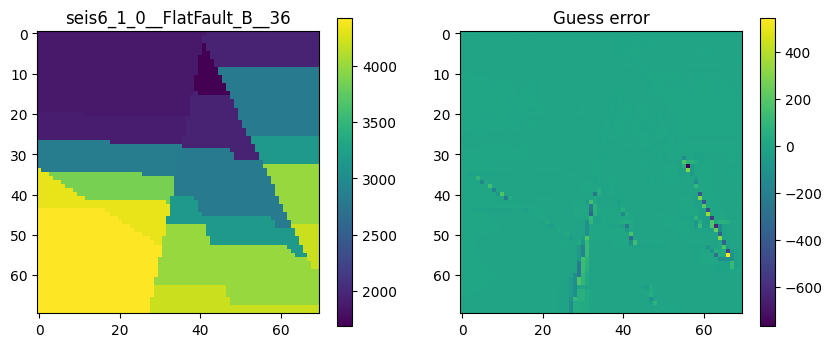

diag 4.0642627337733005e-05
264
500 754.7268984930978
1000 141.68301521603456
MAE update:  4.812568398667205
diag 4.0642627337733005e-05
264
500 1642.097679803251
1000 35.78660746984464
MAE update:  4.633184250971973
diag 4.0642627337733005e-05
264
500 525.3497607044854
MAE update:  4.442187830955609
diag 4.0642627337733005e-05
264
500 317.26487638969616
MAE update:  4.24793638682767
diag 4.0642627337733005e-05
264
500 425.99743246245293
MAE update:  3.8461361513749686


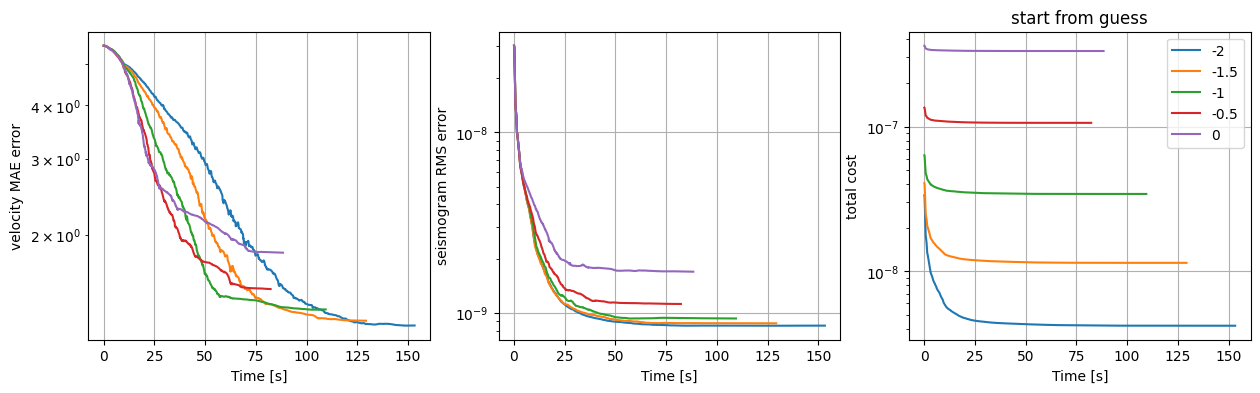

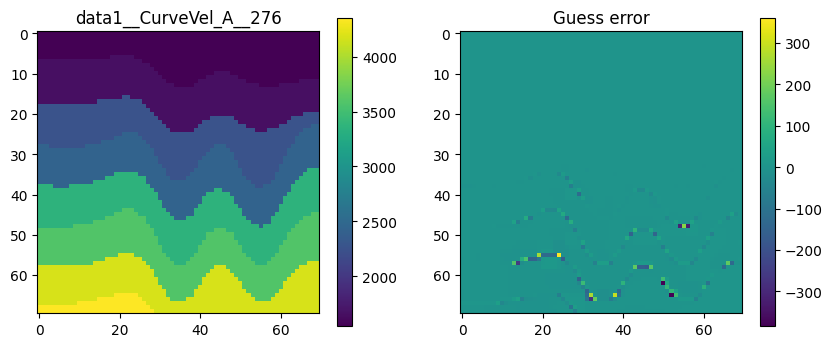

diag 5.026909074425103e-05
262
500 161.89150425988998
MAE update:  3.1439856022993182
diag 5.026909074425103e-05
262
500 90.44826650020354
MAE update:  3.1433080663994195
diag 5.026909074425103e-05
262
500 60.07766680099983
MAE update:  3.1390439131152195
diag 5.026909074425103e-05
262
500 35.1728229009229
MAE update:  3.097745280432041
diag 5.026909074425103e-05
262
500 102.69484549819373
MAE update:  2.9446823094219665


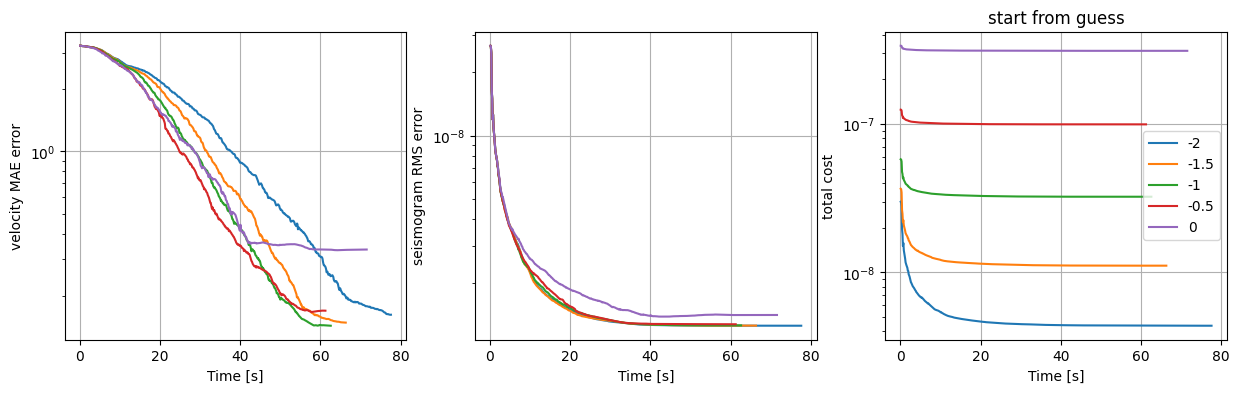

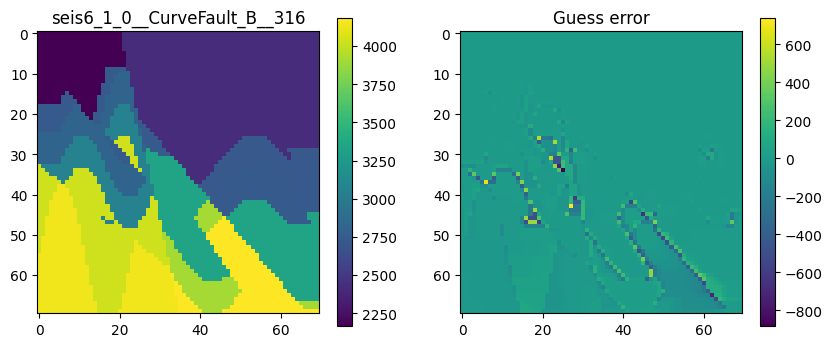

diag 1.7851656121676978e-05
733
500 1025.2042746652521
1000 1669.8386530557357
1500 450.13977622096155
2000 44.342508792573845
MAE update:  17.43040967192616
diag 1.7851656121676978e-05
733
500 2012.1567115324146
1000 290.6176387625056
1500 171.3987436460666
MAE update:  15.843338570035524
diag 1.7851656121676978e-05
733
500 6351.131592855311
1000 332.76767443319716
1500 107.80343823416742
MAE update:  14.223094556765918
diag 1.7851656121676978e-05
733
500 1434.8842666381338
1000 277.8775200145189
1500 35.49604349666699
MAE update:  11.652466495754998
diag 1.7851656121676978e-05
733
500 1242.087266987444
1000 157.96005419846693
1500 25.990577954235025
MAE update:  8.520530011984832


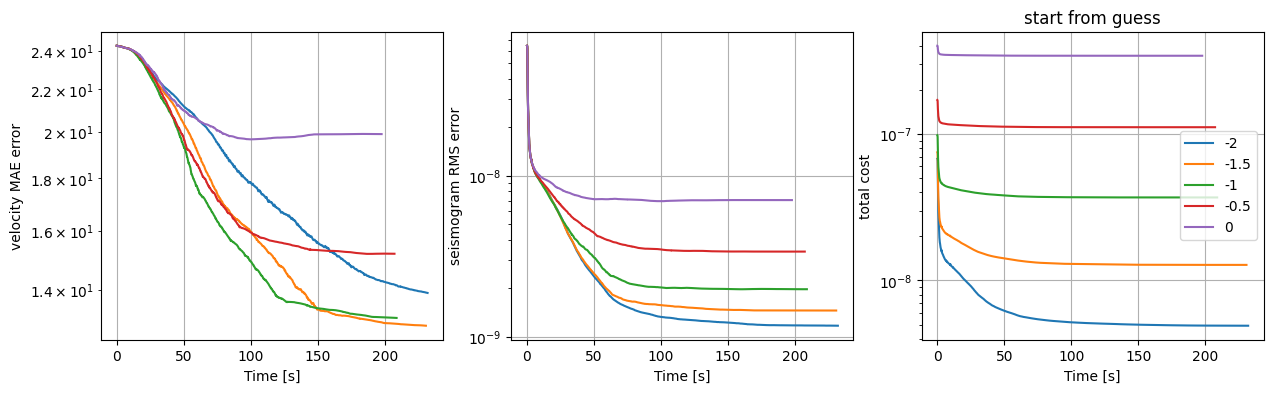

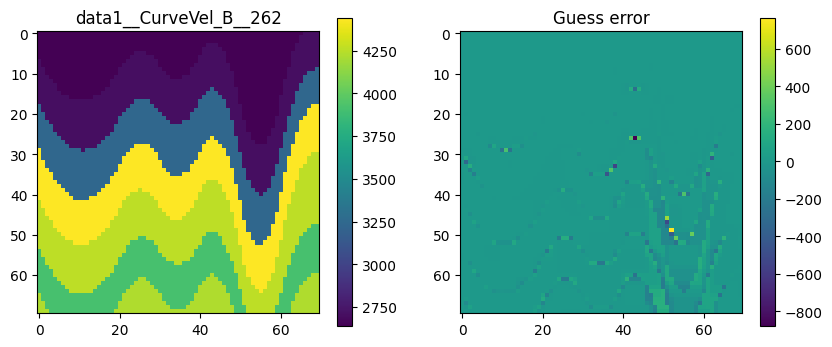

diag 2.244165251008626e-05
588
500 1893.0797179364224
1000 256.32877157286066
1500 74.11567866191228
MAE update:  9.23244030647395
diag 2.244165251008626e-05
588
500 1311.6133779978225
1000 170.79429849674463
1500 28.291788018548434
MAE update:  8.162420686358352
diag 2.244165251008626e-05
588
500 1219.9273910154934
1000 195.49497670094868
MAE update:  6.832500644295507
diag 2.244165251008626e-05
588
500 861.2919123737435
1000 51.37602588404661
MAE update:  5.535899509332515
diag 2.244165251008626e-05
588
500 716.5317046623628
1000 89.78021413778802
MAE update:  4.590771511890312


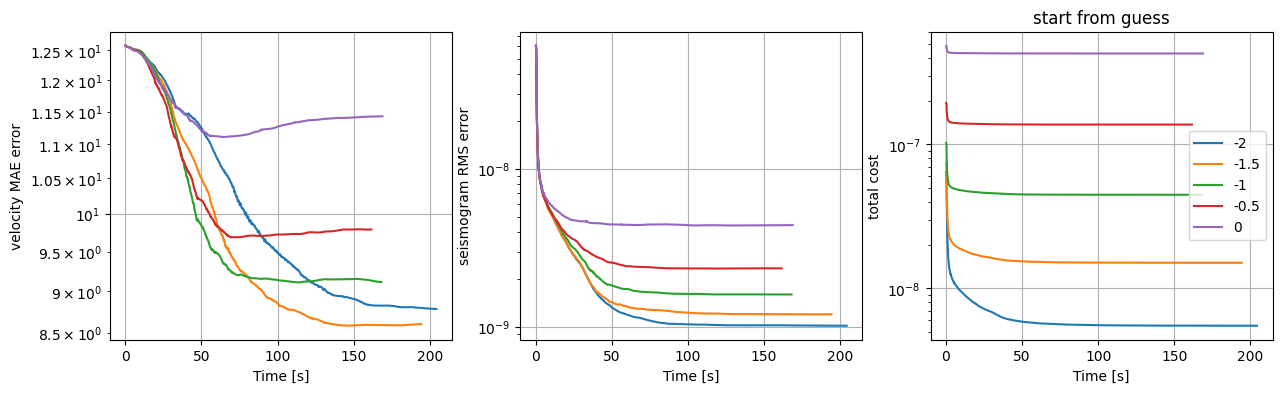

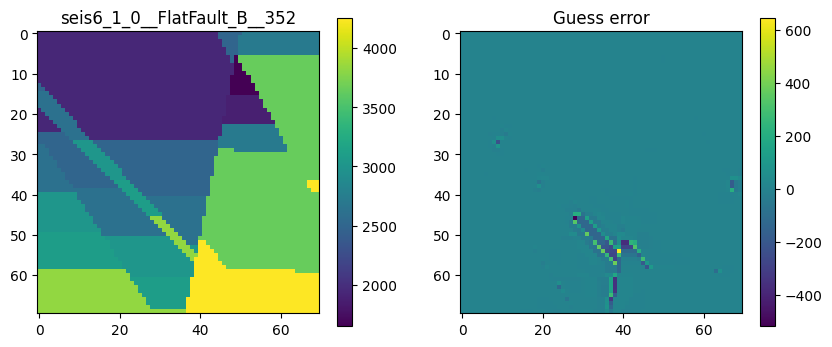

diag 1.6929151817190645e-05
257
500 2484.3057635576447
1000 1049.5899055904215
1500 250.45703167564312
MAE update:  4.419543265864369
diag 1.6929151817190645e-05
257
500 2424.438379872636
1000 197.10909981667103


In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
#model = seis_model.default_model().models[1].model_TV2D
#model.show_convergence = True
#model.iter_list = [1000]

model = seis_model.model_TV2D()
model.show_convergence=True
#model.prior.λ /= 10
model.iter_list = [2000]
model.lbfgs_tolerance_grad = 10.
model.cache_name = 'xxx'
model.write_cache = False
model.read_cache = False
old_prior = model.prior
# import seis_prior
# c1 = 200
# c2 = 100
# model.prior.cost_func = lambda x:c1*(1-cp.exp(-x**2/(2*c2**2)))
# model.prior.grad_cost_func = lambda x:c1*( (x/(c2**2))*cp.exp(-x**2/(2*c2**2)))

# model.prior.cost_func = lambda x: c1 * (1 - 1/(1 + (x/c2)**2))
# model.prior.grad_cost_func = lambda x: c1 * (2 * x / (c2**2 * (1 + (x/c2)**2)**2))

# plt.figure()
# x_vals = cp.linspace(-2000,2000,1000)
# plt.plot(x_vals.get(), model.prior.cost_func(x_vals).get())

model.prior = seis_prior.RestrictFlatAreas()
model.prior.underlying_prior = old_prior
model.prior.diff_threshold1 = 1.
#model.prior.diff_threshold2 = np.inf
model.prior.rrange = 1
model.prior.prep()


start_model = seis_model.model_TV2D_refine()
start_model.train([],[])

do_which_list = [False,False,True]

def param_func(model,value):        
    model.prior.λ *= 10**value
    return model
    
param_values = [-2, -1.5, -1, -0.5, 0]
param_name = "lambda mod"


for d in data:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0., start_model = start_model)

In [ ]:
%debug